In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import ee
import geemap
Map= geemap.Map()

In [3]:
# Open the CSV file with UTF-8 encoding and handle encoding errors
with open("CSLAP-joined-ADKlakes.csv", mode='r', encoding='utf-8', errors='ignore') as file:
    data_Temp = pd.read_csv(file)


In [4]:
data_Temp

,wkt_geom,Lake_ID,Lake_Name,Lat,Lon,pr,Permanent_,FDate,GNIS_ID,GNIS_Name,AreaSqKm,Elevation,FCode,Shape_Leng,Shape_Area,NHDPlusID,VPUID
0,Point (-75.27839699999999823 43.69369900000000...,0801BRA0689,BRANTINGHAM LAKE,43.693699,-75.278397,CSL,131845875,11/6/19,944653.0,Brantingham Lake,1.350795,376.0,39009,0.123688,0.000151,6.000060e+13,414
1,Point (-74.72997999999999763 43.76924000000000...,0801BUG0789,BUG LAKE,43.769240,-74.729980,LCI,131844242,11/6/19,945115.0,Bug Lake,0.358280,608.0,39009,0.042034,0.000040,6.000060e+13,414
2,Point (-75.30290200000000311 43.75759899999999...,0801CHA0597,CHASE LAKE,43.757599,-75.302902,CSL,131845260,11/6/19,946432.0,Chase Lake,0.473086,379.0,39009,0.075871,0.000053,6.000060e+13,414
3,Point (-75.14216600000000312 43.66607900000000...,0801COP0710,COPPER LAKE,43.666079,-75.142166,LCI,131845963,11/6/19,947418.0,Copper Lake,0.243528,0.0,39004,0.043717,0.000027,6.000060e+13,414
4,Point (-74.86241330000000005 43.79573690000000...,0801DAR0750,DART LAKE,43.795737,-74.862413,LCI,131844150,11/6/19,948043.0,Dart Lake,0.565892,537.0,39009,0.051975,0.000063,6.000060e+13,414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,Point (-74.59980000000000189 43.18840000000000...,1201PLE0745,PLEASANT LAKE,43.188400,-74.599800,CSL,53542009,8/28/02,960711.0,Pleasant Lake,0.983000,496.8,39009,0.068506,0.000109,1.000070e+13,202
109,Point (-74.36404419000000132 43.1177635199999969),1201VAN0689,VANDENBURG POND,43.117764,-74.364044,LCI,47727911,11/1/10,968449.0,Vandenburgh Pond,0.583000,1485.0,39009,0.067483,0.000064,1.000070e+13,202
110,Point (-74.49549899999999525 43.13709999999999...,1201WCA0698,WEST CAROGA LAKE,43.137100,-74.495499,CSL,53542311,1/12/13,979704.0,Caroga Lake,2.236896,442.6,39009,0.146666,0.000247,1.000070e+13,202
111,Point (-74.76137760000000299 43.55491090000000...,1203DEE0911,DEER LAKE,43.554911,-74.761378,LCI,53540061,8/28/02,948203.0,Deer Lake,0.143000,0.0,39004,0.024047,0.000016,1.000070e+13,202


In [5]:

cslap_data = data_Temp.rename(columns={
    'Permanent_': 'PERMANENT_ID',
    'Lake_Name':'PONDNAME'})

cslap_data

,wkt_geom,Lake_ID,PONDNAME,Lat,Lon,pr,PERMANENT_ID,FDate,GNIS_ID,GNIS_Name,AreaSqKm,Elevation,FCode,Shape_Leng,Shape_Area,NHDPlusID,VPUID
0,Point (-75.27839699999999823 43.69369900000000...,0801BRA0689,BRANTINGHAM LAKE,43.693699,-75.278397,CSL,131845875,11/6/19,944653.0,Brantingham Lake,1.350795,376.0,39009,0.123688,0.000151,6.000060e+13,414
1,Point (-74.72997999999999763 43.76924000000000...,0801BUG0789,BUG LAKE,43.769240,-74.729980,LCI,131844242,11/6/19,945115.0,Bug Lake,0.358280,608.0,39009,0.042034,0.000040,6.000060e+13,414
2,Point (-75.30290200000000311 43.75759899999999...,0801CHA0597,CHASE LAKE,43.757599,-75.302902,CSL,131845260,11/6/19,946432.0,Chase Lake,0.473086,379.0,39009,0.075871,0.000053,6.000060e+13,414
3,Point (-75.14216600000000312 43.66607900000000...,0801COP0710,COPPER LAKE,43.666079,-75.142166,LCI,131845963,11/6/19,947418.0,Copper Lake,0.243528,0.0,39004,0.043717,0.000027,6.000060e+13,414
4,Point (-74.86241330000000005 43.79573690000000...,0801DAR0750,DART LAKE,43.795737,-74.862413,LCI,131844150,11/6/19,948043.0,Dart Lake,0.565892,537.0,39009,0.051975,0.000063,6.000060e+13,414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,Point (-74.59980000000000189 43.18840000000000...,1201PLE0745,PLEASANT LAKE,43.188400,-74.599800,CSL,53542009,8/28/02,960711.0,Pleasant Lake,0.983000,496.8,39009,0.068506,0.000109,1.000070e+13,202
109,Point (-74.36404419000000132 43.1177635199999969),1201VAN0689,VANDENBURG POND,43.117764,-74.364044,LCI,47727911,11/1/10,968449.0,Vandenburgh Pond,0.583000,1485.0,39009,0.067483,0.000064,1.000070e+13,202
110,Point (-74.49549899999999525 43.13709999999999...,1201WCA0698,WEST CAROGA LAKE,43.137100,-74.495499,CSL,53542311,1/12/13,979704.0,Caroga Lake,2.236896,442.6,39009,0.146666,0.000247,1.000070e+13,202
111,Point (-74.76137760000000299 43.55491090000000...,1203DEE0911,DEER LAKE,43.554911,-74.761378,LCI,53540061,8/28/02,948203.0,Deer Lake,0.143000,0.0,39004,0.024047,0.000016,1.000070e+13,202


In [6]:
# Check the number of unique Lake_ID values in df_combined
unique_lake_ids = cslap_data['PERMANENT_ID'].nunique()
print("Number of unique Lake_ID values:", unique_lake_ids)


Number of unique Lake_ID values: 112


In [19]:
cslap_data

,wkt_geom,Lake_ID,PONDNAME,Lat,Lon,pr,PERMANENT_ID,FDate,GNIS_ID,GNIS_Name,AreaSqKm,Elevation,FCode,Shape_Leng,Shape_Area,NHDPlusID,VPUID
0,Point (-75.27839699999999823 43.69369900000000...,0801BRA0689,BRANTINGHAM LAKE,43.693699,-75.278397,CSL,131845875,11/6/19,944653.0,Brantingham Lake,1.350795,376.0,39009,0.123688,0.000151,6.000060e+13,414
1,Point (-74.72997999999999763 43.76924000000000...,0801BUG0789,BUG LAKE,43.769240,-74.729980,LCI,131844242,11/6/19,945115.0,Bug Lake,0.358280,608.0,39009,0.042034,0.000040,6.000060e+13,414
2,Point (-75.30290200000000311 43.75759899999999...,0801CHA0597,CHASE LAKE,43.757599,-75.302902,CSL,131845260,11/6/19,946432.0,Chase Lake,0.473086,379.0,39009,0.075871,0.000053,6.000060e+13,414
3,Point (-75.14216600000000312 43.66607900000000...,0801COP0710,COPPER LAKE,43.666079,-75.142166,LCI,131845963,11/6/19,947418.0,Copper Lake,0.243528,0.0,39004,0.043717,0.000027,6.000060e+13,414
4,Point (-74.86241330000000005 43.79573690000000...,0801DAR0750,DART LAKE,43.795737,-74.862413,LCI,131844150,11/6/19,948043.0,Dart Lake,0.565892,537.0,39009,0.051975,0.000063,6.000060e+13,414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,Point (-74.59980000000000189 43.18840000000000...,1201PLE0745,PLEASANT LAKE,43.188400,-74.599800,CSL,53542009,8/28/02,960711.0,Pleasant Lake,0.983000,496.8,39009,0.068506,0.000109,1.000070e+13,202
109,Point (-74.36404419000000132 43.1177635199999969),1201VAN0689,VANDENBURG POND,43.117764,-74.364044,LCI,47727911,11/1/10,968449.0,Vandenburgh Pond,0.583000,1485.0,39009,0.067483,0.000064,1.000070e+13,202
110,Point (-74.49549899999999525 43.13709999999999...,1201WCA0698,WEST CAROGA LAKE,43.137100,-74.495499,CSL,53542311,1/12/13,979704.0,Caroga Lake,2.236896,442.6,39009,0.146666,0.000247,1.000070e+13,202
111,Point (-74.76137760000000299 43.55491090000000...,1203DEE0911,DEER LAKE,43.554911,-74.761378,LCI,53540061,8/28/02,948203.0,Deer Lake,0.143000,0.0,39004,0.024047,0.000016,1.000070e+13,202


In [9]:
import pandas as pd
data_AeaP = pd.read_csv("aeap-list-22.csv")
data_AeaP

,wkt_geom,nhdid,PONDNO,PONDNAME,LAKETYPE,LAKETYPE_t,LAKETYPE_d,OWNRSHIP,ELEV,WAREA,SAREA,MAXDEPTH,MEANDEPTH,lake_perim,Long,Lat
0,Point (-75.04294980741312315 43.96331337645752...,133099412,40186,LOON HOLLOW POND,2A10,Thin till drainage,Thin till drainage low DOC,Mixed,607,59.8,5.7,11.6,3.4,1555.1612,-75.042950,43.963313
1,Point (-74.9583414476713159 43.96851595402026902),133099321,40210,WILLYS LAKE (HORSESHOE),2A10,Thin till drainage,Thin till drainage low DOC,Public,630,156.2,24.3,13.7,4.9,3438.2231,-74.958341,43.968516
2,Point (-75.09741610208976681 43.68479070209942...,131845717,40704,MIDDLE SETTLEMENT LAKE,2A10,Thin till drainage,Thin till drainage low DOC,Public,526,98.3,15.8,11.0,3.4,3176.2066,-75.097416,43.684791
3,Point (-75.06102065474662766 43.69255055791023...,131845587,40706,GRASS POND,2B10,Medium till drainage,Medium till drainage low DOC,Public,546,236.7,5.3,5.2,1.5,1522.7253,-75.061021,43.692551
4,Point (-75.10022588886582184 43.69956092726351...,131845583,40707,MIDDLE BRANCH LAKE,2A10,Thin till drainage,Thin till drainage low DOC,Public,494,362.6,17.0,5.2,2.1,2982.0526,-75.100226,43.699561
5,Point (-74.90975308778645569 43.76023007048178...,131844719,40739,LAKE RONDAXE,2A10,Thin till drainage,Thin till drainage low DOC,Mixed,524,14282.9,90.5,10.1,3.0,17345.8432,-74.909753,43.760230
6,Point (-74.85246134846329369 43.7843825530505697),131844377,40746,MOSS LAKE,2B10,Medium till drainage,Medium till drainage low DOC,Public,536,1314.7,45.7,15.2,5.7,3840.6058,-74.852461,43.784383
7,Point (-74.80983062155954144 43.78912373423164...,131844130,40747,CASCADE LAKE,2B00,Medium till drainage,Medium till drainage,Public,553,474.8,40.4,6.1,4.2,4486.9446,-74.809831,43.789124
8,Point (-74.86936556407104604 43.79273530633025...,131844150,40750,DART LAKE,2A10,Thin till drainage,Thin till drainage low DOC,Private,536,10756.5,51.8,17.7,7.3,4668.1648,-74.869366,43.792735
9,Point (-74.85450000000000159 43.82806399999999...,131843856,40752,BIG MOOSE LAKE,2000,Thin till drainage,Thin till drainage,Mixed,556,9584.6,512.5,21.3,6.8,30202.3633,-74.854500,43.828064


In [10]:
import pandas as pd

# Assuming data_AeaP is already loaded from "temp-data.csv"
data_AeaP['pr'] = 'Aeap'
data_AeaP

,wkt_geom,nhdid,PONDNO,PONDNAME,LAKETYPE,LAKETYPE_t,LAKETYPE_d,OWNRSHIP,ELEV,WAREA,SAREA,MAXDEPTH,MEANDEPTH,lake_perim,Long,Lat,pr
0,Point (-75.04294980741312315 43.96331337645752...,133099412,40186,LOON HOLLOW POND,2A10,Thin till drainage,Thin till drainage low DOC,Mixed,607,59.8,5.7,11.6,3.4,1555.1612,-75.042950,43.963313,Aeap
1,Point (-74.9583414476713159 43.96851595402026902),133099321,40210,WILLYS LAKE (HORSESHOE),2A10,Thin till drainage,Thin till drainage low DOC,Public,630,156.2,24.3,13.7,4.9,3438.2231,-74.958341,43.968516,Aeap
2,Point (-75.09741610208976681 43.68479070209942...,131845717,40704,MIDDLE SETTLEMENT LAKE,2A10,Thin till drainage,Thin till drainage low DOC,Public,526,98.3,15.8,11.0,3.4,3176.2066,-75.097416,43.684791,Aeap
3,Point (-75.06102065474662766 43.69255055791023...,131845587,40706,GRASS POND,2B10,Medium till drainage,Medium till drainage low DOC,Public,546,236.7,5.3,5.2,1.5,1522.7253,-75.061021,43.692551,Aeap
4,Point (-75.10022588886582184 43.69956092726351...,131845583,40707,MIDDLE BRANCH LAKE,2A10,Thin till drainage,Thin till drainage low DOC,Public,494,362.6,17.0,5.2,2.1,2982.0526,-75.100226,43.699561,Aeap
5,Point (-74.90975308778645569 43.76023007048178...,131844719,40739,LAKE RONDAXE,2A10,Thin till drainage,Thin till drainage low DOC,Mixed,524,14282.9,90.5,10.1,3.0,17345.8432,-74.909753,43.760230,Aeap
6,Point (-74.85246134846329369 43.7843825530505697),131844377,40746,MOSS LAKE,2B10,Medium till drainage,Medium till drainage low DOC,Public,536,1314.7,45.7,15.2,5.7,3840.6058,-74.852461,43.784383,Aeap
7,Point (-74.80983062155954144 43.78912373423164...,131844130,40747,CASCADE LAKE,2B00,Medium till drainage,Medium till drainage,Public,553,474.8,40.4,6.1,4.2,4486.9446,-74.809831,43.789124,Aeap
8,Point (-74.86936556407104604 43.79273530633025...,131844150,40750,DART LAKE,2A10,Thin till drainage,Thin till drainage low DOC,Private,536,10756.5,51.8,17.7,7.3,4668.1648,-74.869366,43.792735,Aeap
9,Point (-74.85450000000000159 43.82806399999999...,131843856,40752,BIG MOOSE LAKE,2000,Thin till drainage,Thin till drainage,Mixed,556,9584.6,512.5,21.3,6.8,30202.3633,-74.854500,43.828064,Aeap


In [11]:

data_AeaP = data_AeaP.rename(columns={
    'nhdid': 'PERMANENT_ID',
    'Long': 'Lon'})
        
    

data_AeaP

,wkt_geom,PERMANENT_ID,PONDNO,PONDNAME,LAKETYPE,LAKETYPE_t,LAKETYPE_d,OWNRSHIP,ELEV,WAREA,SAREA,MAXDEPTH,MEANDEPTH,lake_perim,Lon,Lat,pr
0,Point (-75.04294980741312315 43.96331337645752...,133099412,40186,LOON HOLLOW POND,2A10,Thin till drainage,Thin till drainage low DOC,Mixed,607,59.8,5.7,11.6,3.4,1555.1612,-75.042950,43.963313,Aeap
1,Point (-74.9583414476713159 43.96851595402026902),133099321,40210,WILLYS LAKE (HORSESHOE),2A10,Thin till drainage,Thin till drainage low DOC,Public,630,156.2,24.3,13.7,4.9,3438.2231,-74.958341,43.968516,Aeap
2,Point (-75.09741610208976681 43.68479070209942...,131845717,40704,MIDDLE SETTLEMENT LAKE,2A10,Thin till drainage,Thin till drainage low DOC,Public,526,98.3,15.8,11.0,3.4,3176.2066,-75.097416,43.684791,Aeap
3,Point (-75.06102065474662766 43.69255055791023...,131845587,40706,GRASS POND,2B10,Medium till drainage,Medium till drainage low DOC,Public,546,236.7,5.3,5.2,1.5,1522.7253,-75.061021,43.692551,Aeap
4,Point (-75.10022588886582184 43.69956092726351...,131845583,40707,MIDDLE BRANCH LAKE,2A10,Thin till drainage,Thin till drainage low DOC,Public,494,362.6,17.0,5.2,2.1,2982.0526,-75.100226,43.699561,Aeap
5,Point (-74.90975308778645569 43.76023007048178...,131844719,40739,LAKE RONDAXE,2A10,Thin till drainage,Thin till drainage low DOC,Mixed,524,14282.9,90.5,10.1,3.0,17345.8432,-74.909753,43.760230,Aeap
6,Point (-74.85246134846329369 43.7843825530505697),131844377,40746,MOSS LAKE,2B10,Medium till drainage,Medium till drainage low DOC,Public,536,1314.7,45.7,15.2,5.7,3840.6058,-74.852461,43.784383,Aeap
7,Point (-74.80983062155954144 43.78912373423164...,131844130,40747,CASCADE LAKE,2B00,Medium till drainage,Medium till drainage,Public,553,474.8,40.4,6.1,4.2,4486.9446,-74.809831,43.789124,Aeap
8,Point (-74.86936556407104604 43.79273530633025...,131844150,40750,DART LAKE,2A10,Thin till drainage,Thin till drainage low DOC,Private,536,10756.5,51.8,17.7,7.3,4668.1648,-74.869366,43.792735,Aeap
9,Point (-74.85450000000000159 43.82806399999999...,131843856,40752,BIG MOOSE LAKE,2000,Thin till drainage,Thin till drainage,Mixed,556,9584.6,512.5,21.3,6.8,30202.3633,-74.854500,43.828064,Aeap


In [21]:
# Assuming data_AeaP is your DataFrame
unique_data_AeaP = data_AeaP.drop_duplicates(subset=['PERMANENT_ID', 'PONDNAME', 'Lon', 'Lat', 'pr'])

# Display the unique data
unique_data_AeaP

,wkt_geom,PERMANENT_ID,PONDNO,PONDNAME,LAKETYPE,LAKETYPE_t,LAKETYPE_d,OWNRSHIP,ELEV,WAREA,SAREA,MAXDEPTH,MEANDEPTH,lake_perim,Lon,Lat,pr
0,Point (-75.04294980741312315 43.96331337645752...,133099412,40186,LOON HOLLOW POND,2A10,Thin till drainage,Thin till drainage low DOC,Mixed,607,59.8,5.7,11.6,3.4,1555.1612,-75.042950,43.963313,Aeap
1,Point (-74.9583414476713159 43.96851595402026902),133099321,40210,WILLYS LAKE (HORSESHOE),2A10,Thin till drainage,Thin till drainage low DOC,Public,630,156.2,24.3,13.7,4.9,3438.2231,-74.958341,43.968516,Aeap
2,Point (-75.09741610208976681 43.68479070209942...,131845717,40704,MIDDLE SETTLEMENT LAKE,2A10,Thin till drainage,Thin till drainage low DOC,Public,526,98.3,15.8,11.0,3.4,3176.2066,-75.097416,43.684791,Aeap
3,Point (-75.06102065474662766 43.69255055791023...,131845587,40706,GRASS POND,2B10,Medium till drainage,Medium till drainage low DOC,Public,546,236.7,5.3,5.2,1.5,1522.7253,-75.061021,43.692551,Aeap
4,Point (-75.10022588886582184 43.69956092726351...,131845583,40707,MIDDLE BRANCH LAKE,2A10,Thin till drainage,Thin till drainage low DOC,Public,494,362.6,17.0,5.2,2.1,2982.0526,-75.100226,43.699561,Aeap
5,Point (-74.90975308778645569 43.76023007048178...,131844719,40739,LAKE RONDAXE,2A10,Thin till drainage,Thin till drainage low DOC,Mixed,524,14282.9,90.5,10.1,3.0,17345.8432,-74.909753,43.760230,Aeap
6,Point (-74.85246134846329369 43.7843825530505697),131844377,40746,MOSS LAKE,2B10,Medium till drainage,Medium till drainage low DOC,Public,536,1314.7,45.7,15.2,5.7,3840.6058,-74.852461,43.784383,Aeap
7,Point (-74.80983062155954144 43.78912373423164...,131844130,40747,CASCADE LAKE,2B00,Medium till drainage,Medium till drainage,Public,553,474.8,40.4,6.1,4.2,4486.9446,-74.809831,43.789124,Aeap
8,Point (-74.86936556407104604 43.79273530633025...,131844150,40750,DART LAKE,2A10,Thin till drainage,Thin till drainage low DOC,Private,536,10756.5,51.8,17.7,7.3,4668.1648,-74.869366,43.792735,Aeap
9,Point (-74.85450000000000159 43.82806399999999...,131843856,40752,BIG MOOSE LAKE,2000,Thin till drainage,Thin till drainage,Mixed,556,9584.6,512.5,21.3,6.8,30202.3633,-74.854500,43.828064,Aeap


In [13]:
# Concatenate the DataFrames along the rows axis (axis=0) with selected columns
cslap_aeap = pd.concat([cslap_data[['PERMANENT_ID', 'PONDNAME', 'Lon', 'Lat','pr']], 
                        unique_data_AeaP[['PERMANENT_ID', 'PONDNAME', 'Lon', 'Lat','pr']]], ignore_index=True)

# Print the concatenated DataFrame
cslap_aeap

,PERMANENT_ID,PONDNAME,Lon,Lat,pr
0,131845875,BRANTINGHAM LAKE,-75.278397,43.693699,CSL
1,131844242,BUG LAKE,-74.729980,43.769240,LCI
2,131845260,CHASE LAKE,-75.302902,43.757599,CSL
3,131845963,COPPER LAKE,-75.142166,43.666079,LCI
4,131844150,DART LAKE,-74.862413,43.795737,LCI
...,...,...,...,...,...
131,47723283,WILLIS LAKE,-74.241514,43.368912,Aeap
132,47724773,JOCKEYBUSH LAKE,-74.585425,43.302292,Aeap
133,132437679,SAGAMORE LAKE,-74.622173,43.768003,Aeap
134,132437639,QUEER LAKE,-74.803991,43.813308,Aeap


In [14]:
cslap_aeap.dropna(inplace=True)

In [15]:
# Check the number of unique Lake_ID values in df_combined
unique_lake_ids = cslap_aeap['PERMANENT_ID'].nunique()
print("Number of unique Lake_ID values:", unique_lake_ids)


Number of unique Lake_ID values: 135


In [16]:
cslap_aeap

,PERMANENT_ID,PONDNAME,Lon,Lat,pr
0,131845875,BRANTINGHAM LAKE,-75.278397,43.693699,CSL
1,131844242,BUG LAKE,-74.729980,43.769240,LCI
2,131845260,CHASE LAKE,-75.302902,43.757599,CSL
3,131845963,COPPER LAKE,-75.142166,43.666079,LCI
4,131844150,DART LAKE,-74.862413,43.795737,LCI
...,...,...,...,...,...
131,47723283,WILLIS LAKE,-74.241514,43.368912,Aeap
132,47724773,JOCKEYBUSH LAKE,-74.585425,43.302292,Aeap
133,132437679,SAGAMORE LAKE,-74.622173,43.768003,Aeap
134,132437639,QUEER LAKE,-74.803991,43.813308,Aeap


## Landsat 7

In [23]:
ee.Initialize()

# Define the Landsat 5 bands and their corresponding standard names
LC7_BANDS = ['ST_B6']
STD_NAMES = ['temp_satellite']

# all_lakes=ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALAP-ALTM-Lakes-195')

def maskL457sr(image):
    qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
    saturationMask = image.select('QA_RADSAT').eq(0)
    waterMask = image.select('QA_PIXEL').eq(5440).Or(image.select('QA_PIXEL').eq(5504))
    opticalBands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBand = image.select('ST_B6').multiply(0.00341802).add(-124.15)
    return image.addBands(opticalBands, None, True).addBands(thermalBand, None, True).updateMask(qaMask).updateMask(saturationMask).updateMask(waterMask)

def maskL457sr_SUMMER(image):
    qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
    saturationMask = image.select('QA_RADSAT').eq(0)
    waterMask = image.select('QA_PIXEL').eq(5440).Or(image.select('QA_PIXEL').eq(5504))
    opticalBands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBand = image.select('ST_B6').multiply(0.00341802).add(-124.15)
    #39000 is equivalent to 10 degree celcius
    temp_Summer = image.select('ST_B6').gt(40000)
    return image.addBands(opticalBands, None, True).addBands(thermalBand, None, True).updateMask(qaMask).updateMask(saturationMask).updateMask(waterMask).updateMask(temp_Summer)


# Define a function to compute the mean reflectance values for the specified bands within the region of interest (lake)
def reflectance(img, lake):
    reflectance_values = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=lake, scale=30).select(STD_NAMES)
    return img.set('DATE_SMP', img.date().format()).set('reflectance', reflectance_values)

# Initialize an empty list to store the dataframes for each lake
dfs = []

# cslap_aeap['date'] = pd.to_datetime(cslap_aeap['date'])

cslap_aeap_filtered = cslap_aeap[(cslap_aeap['Lat'].notnull()) & (cslap_aeap['Lon'].notnull())]

# Loop through each lake name and retrieve Landsat 5 imagery for that lake
for index, row in cslap_aeap_filtered.iterrows():
    # Extract lake information
    pondId = row['PERMANENT_ID']
    pondname = row['PONDNAME']
    Lon = row['Lon']
    Lat = row['Lat']
    pr = row['pr']
    
  
    # if isinstance(date, str):
    #     date = pd.to_datetime(date)
 
    # # Create a 2-day window around the current date
    # date_window_start = date - pd.Timedelta(days=3)
    # date_window_end = date + pd.Timedelta(days=3) # Tolerance applied later in the code

    lake_point = ee.Geometry.Point(row['Lon'], row['Lat'])

    #Create a 100-meter buffered box around the lake point
    lake_polygon = lake_point.buffer(100)
 
    # Retrieve Landsat 7 imagery for the specific lake
    l7 = ee.ImageCollection('LANDSAT/LE07/C02/T1_L2') \
        .filter(ee.Filter.calendarRange(6, 9, 'month')) \
        .filterBounds(lake_polygon) \
        .filter(ee.Filter.lt('CLOUD_COVER', 15)) \
        .map(maskL457sr_SUMMER) \
        .select(LC7_BANDS, STD_NAMES)


      # .filter(ee.Filter.calendarRange(5, 12, 'month')) \
      #   .filter(ee.Filter.calendarRange(1984, 2011, 'year')) \
    
    # Map the reflectance function over the Landsat 5 ImageCollection for the specific lake
    map_reflectance = l7.map(lambda img: reflectance(img, lake_polygon))

    # Reduce the mapped image collection to get reflectance values for the specific lake
    list_reflectance = map_reflectance.reduceColumns(ee.Reducer.toList(2), ['DATE_SMP', 'reflectance']).values().get(0)

    # Convert the results to a pandas DataFrame
    df_reflectance = pd.DataFrame(list_reflectance.getInfo(), columns=['DATE_SMP', 'reflectance'])
    df_reflectance['DATE_SMP'] = pd.to_datetime(df_reflectance['DATE_SMP'])
    df_reflectance['DATE_SMP'] = df_reflectance['DATE_SMP'].dt.date
    df_reflectance['reflectance'] = df_reflectance['reflectance'].apply(lambda x: {k: v for k, v in x.items() if v is not None})

    # Unpack the 'reflectance' dictionary and create separate columns for each band
    df_reflectance = pd.concat([df_reflectance.drop('reflectance', axis=1),
                                df_reflectance['reflectance'].apply(pd.Series).astype('float64', errors='ignore')], axis=1)
    
    df_reflectance['PERMANENT_ID'] = pondId
    df_reflectance['SITE_NAME'] = pondname
    df_reflectance['Lon'] = Lon
    df_reflectance['Lat'] = Lat
    df_reflectance['pr'] = pr


    # Add the DataFrame to the list
    dfs.append(df_reflectance)


# Concatenate all DataFrames into a single DataFrame
df_all_lakes_l7_SUMMER = pd.concat(dfs, ignore_index=True)

# Sort the DataFrame by 'DATE_SMP' in ascending order
df_all_lakes_l7_SUMMER.sort_values(by='DATE_SMP', inplace=True)

# df_all_lakes.dropna(inplace=True)
df_all_lakes_l7_SUMMER

,DATE_SMP,temp_satellite,PERMANENT_ID,SITE_NAME,Lon,Lat,pr
4047,1999-07-12,22.352847,129690937,LAKE CLEAR,-74.252296,44.369202,CSL
9347,1999-07-12,22.559218,131843304,CONSTABLE POND,-74.796543,43.833312,Aeap
1319,1999-07-12,23.323891,131844637,SIXTH LAKE,-74.773570,43.749030,LCI
7760,1999-07-12,22.568794,53542293,CANADA LAKE,-74.529297,43.165402,CSL
2940,1999-07-12,22.562546,132434585,LITTLE SIMON POND,-74.444400,44.154200,LCI
...,...,...,...,...,...,...,...
4951,2023-09-28,NaN,115353567,FERN LAKE,-73.721980,44.487640,LCI
4916,2023-09-28,15.954335,115353625,BUTTERNUT POND,-73.498382,44.427832,LCI
2302,2023-09-28,13.446156,132434562,EAGLE CRAG LAKE,-74.610100,44.173801,CSL
1610,2023-09-28,13.594216,135271226,BARNUM POND,-74.255390,44.460870,LCI


In [16]:
df_all_lakes_l7_SUMMER.dropna(inplace=True)
df_all_lakes_l7_SUMMER


,DATE_SMP,temp_satellite,PERMANENT_ID,SITE_NAME,Lon,Lat,pr
4047,1999-07-12,22.352847,129690937,LAKE CLEAR,-74.252296,44.369202,CSL
9347,1999-07-12,22.559218,131843304,CONSTABLE POND,-74.796543,43.833312,Aeap
1319,1999-07-12,23.323891,131844637,SIXTH LAKE,-74.773570,43.749030,LCI
7760,1999-07-12,22.568794,53542293,CANADA LAKE,-74.529297,43.165402,CSL
2940,1999-07-12,22.562546,132434585,LITTLE SIMON POND,-74.444400,44.154200,LCI
...,...,...,...,...,...,...,...
2218,2023-09-28,13.384649,132434735,BRIDGE BROOK POND,-74.579597,44.160961,LCI
4916,2023-09-28,15.954335,115353625,BUTTERNUT POND,-73.498382,44.427832,LCI
2302,2023-09-28,13.446156,132434562,EAGLE CRAG LAKE,-74.610100,44.173801,CSL
1610,2023-09-28,13.594216,135271226,BARNUM POND,-74.255390,44.460870,LCI


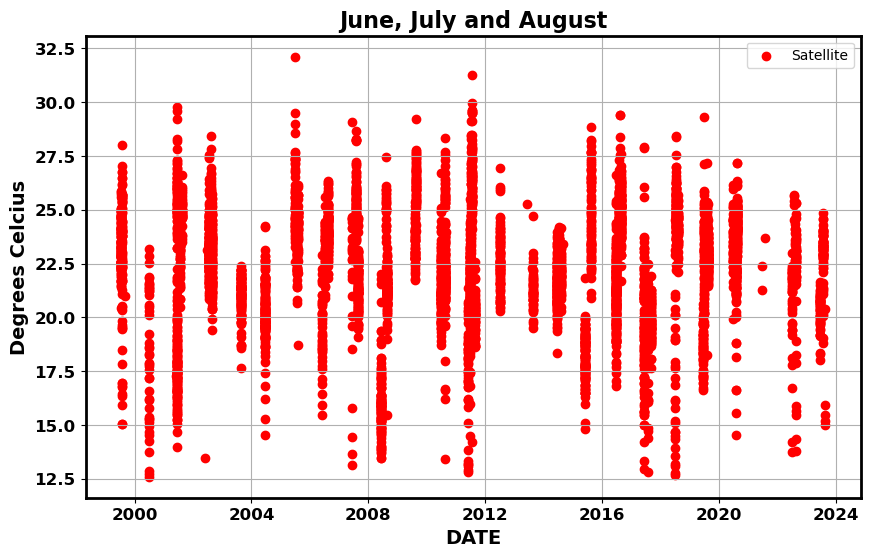

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_all_lakes_Landsat5 is your DataFrame
# Convert the date column to datetime format
df_all_lakes_l7_SUMMER['DATE_SMP'] = pd.to_datetime(df_all_lakes_l7_SUMMER['DATE_SMP'])
# cslap_aeap['date'] = pd.to_datetime(cslap_aeap['date'])

# Filter the data for the specified months
months_filter = df_all_lakes_l7_SUMMER['DATE_SMP'].dt.month.isin([6, 7, 8])
filtered_data = df_all_lakes_l7_SUMMER[months_filter]

# Plot temp_satellite and temp_excel in different colors
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['DATE_SMP'], filtered_data['temp_satellite'], label='Satellite', color='red')
# plt.scatter(cslap_aeap['date'], cslap_aeap['temp'], label='Field', color='blue')

plt.xlabel('DATE', fontsize=14, fontweight='bold')  # Set font size and weight for x-axis label
plt.ylabel('Degrees Celcius', fontsize=14, fontweight='bold')  # Set font size and weight for y-axis label
plt.title('June, July and August', fontsize=16, fontweight='bold')  # Set font size and weight for title

plt.legend()
plt.grid(True)

# Set border properties
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)  # Set border linewidth to bold

# Set ticks font size and weight
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.show()


In [18]:
import pandas as pd


# Specify the file path where you want to save the Excel file
file_path = 'Landsat7_135_LAKES_CSLAP_AEAP_TEMP_15%_SUMMER_100m_4302024.xlsx'

# Export the DataFrame to Excel
# df_all_lakes_l7_SUMMER.to_excel(file_path, index=False)   #UNCOMMENT THIS IF YOU WANT TO EXPORT IT TO EXCEL

print(f"DataFrame exported to '{file_path}' successfully.")

DataFrame exported to 'Landsat7_135_LAKES_CSLAP_AEAP_TEMP_15%_SUMMER_100m_4302024.xlsx' successfully.


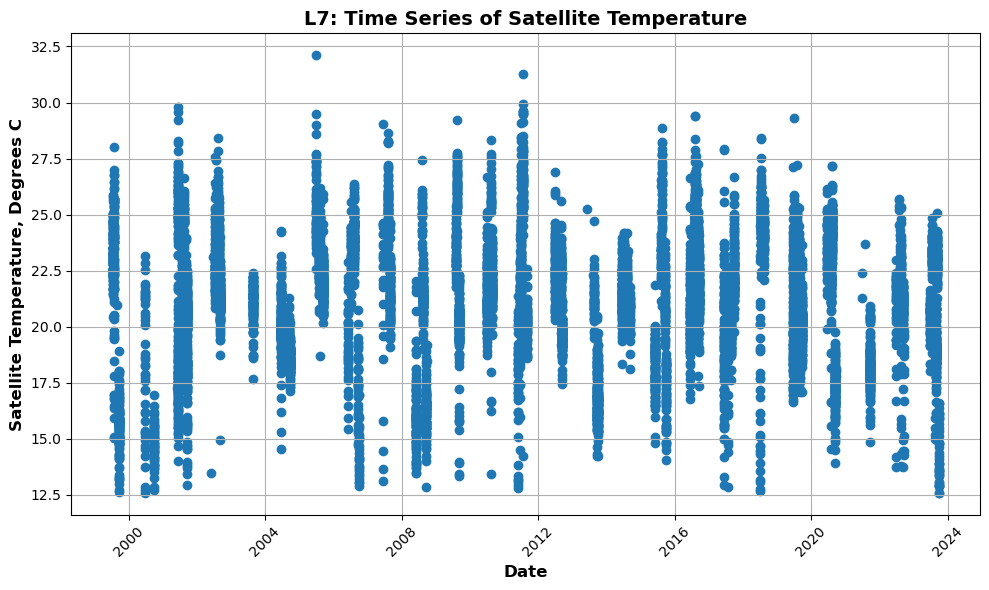

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
df_all_lakes_l7=df_all_lakes_l7_SUMMER

# Convert DATE_SMP column to datetime format
df_all_lakes_l7_SUMMER['DATE_SMP'] = pd.to_datetime(df_all_lakes_l7_SUMMER['DATE_SMP'])

# Sort the DataFrame by DATE_SMP
df_all_lakes_l7_SUMMER.sort_values(by='DATE_SMP', inplace=True)

# Plot the time series
plt.figure(figsize=(10, 6))
plt.scatter(df_all_lakes_l7['DATE_SMP'], df_all_lakes_l7['temp_satellite'], marker='o', linestyle='-')
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Satellite Temperature, Degrees C', fontsize=12, fontweight='bold')
plt.title('L7: Time Series of Satellite Temperature', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()


In [26]:
import pandas as pd

# Read the first time series data from CSV
file_path = 'Landsat7_135_LAKES_CSLAP_AEAP_TEMP_15%_SUMMER_100m_4302024.xlsx'

df2 = pd.read_excel(file_path)

# Read the second time series data from CSV
file_path1 = 'CSLAP_AEAP_TEMP.xlsx'

df1 = pd.read_excel(file_path1)
# Convert 'PERMANENT_ID' column to numeric dtype
df1['PERMANENT_ID'] = pd.to_numeric(df1['PERMANENT_ID'], errors='coerce')
df2['PERMANENT_ID'] = pd.to_numeric(df2['PERMANENT_ID'], errors='coerce')
# Convert the 'date' columns to datetime objects

df2['date'] = pd.to_datetime(df2['DATE_SMP']).dt.date
df1['date'] = pd.to_datetime(df1['date']).dt.date

df2

,DATE_SMP,temp_satellite,PERMANENT_ID,SITE_NAME,Lon,Lat,pr,date
0,1999-07-12,22.352847,129690937.0,LAKE CLEAR,-74.252296,44.369202,CSL,1999-07-12
1,1999-07-12,22.559218,131843304.0,CONSTABLE POND,-74.796543,43.833312,Aeap,1999-07-12
2,1999-07-12,23.323891,131844637.0,SIXTH LAKE,-74.773570,43.749030,LCI,1999-07-12
3,1999-07-12,22.568794,53542293.0,CANADA LAKE,-74.529297,43.165402,CSL,1999-07-12
4,1999-07-12,22.562546,132434585.0,LITTLE SIMON POND,-74.444400,44.154200,LCI,1999-07-12
...,...,...,...,...,...,...,...,...
8463,2023-09-28,13.384649,132434735.0,BRIDGE BROOK POND,-74.579597,44.160961,LCI,2023-09-28
8464,2023-09-28,15.954335,115353625.0,BUTTERNUT POND,-73.498382,44.427832,LCI,2023-09-28
8465,2023-09-28,13.446156,132434562.0,EAGLE CRAG LAKE,-74.610100,44.173801,CSL,2023-09-28
8466,2023-09-28,13.594216,135271226.0,BARNUM POND,-74.255390,44.460870,LCI,2023-09-28


In [27]:
# Merge satellite temperature data and field temperature data

import pandas as pd
# Drop rows with null values in 'PERMANENT_ID' column of the left DataFrame
df1.dropna(subset=['PERMANENT_ID'], inplace=True)

# Drop rows with null values in 'PERMANENT_ID' column of the right DataFrame
df2.dropna(subset=['PERMANENT_ID'], inplace=True)

# Initialize an empty list to store the merged data
merged_data = []

# Iterate over unique lake IDs in df2
for lake_id in df1['PERMANENT_ID'].unique():
    # Subset df1 for the current lake ID
    df1_subset = df1[df1['PERMANENT_ID'] == lake_id]
    
    # Subset df2 for the current lake ID
    df2_subset = df2[df2['PERMANENT_ID'] == lake_id]
    
    # Iterate over rows in df2 subset
    for _, row2 in df2_subset.iterrows():
        # Iterate over rows in df1 subset
        for _, row1 in df1_subset.iterrows():
            # Check if both dates are not null
            if pd.notnull(row1['date']) and pd.notnull(row2['date']):
                # Calculate the difference in dates
                date_diff = abs((row1['date'] - row2['date']).days)
                
                # Check if the dates match within the tolerance of ±3 days
                if date_diff <= 3:
                    # Add the 'temp' value from df1 to a new column in df2
                    row2['temp_field'] = row1['temp']
                    # Append the merged row to the list
                    merged_data.append(row2)
                    break  # Exit the inner loop once a matching date is found

# Create a DataFrame from the merged_data list
df_all_lakes_l7_cslap_aeap = pd.DataFrame(merged_data)

# Save the merged DataFrame to a CSV file
# merged_df.to_csv('merged_data.csv', index=False)

df_all_lakes_l7_cslap_aeap

# Save the merged DataFrame to a CSV file
# df_all_lakes_l7_cslap_aeap.to_csv('17-scatter-sample-satellite-100m-15%.csv', index=False)

,DATE_SMP,temp_satellite,PERMANENT_ID,SITE_NAME,Lon,Lat,pr,date,temp_field
4466,2012-09-17,20.069814,131845875.0,BRANTINGHAM LAKE,-75.278397,43.693699,CSL,2012-09-17,19.5
4770,2014-06-19,22.526515,131845875.0,BRANTINGHAM LAKE,-75.278397,43.693699,CSL,2014-06-19,27.0
6262,2017-06-11,14.982404,131845875.0,BRANTINGHAM LAKE,-75.278397,43.693699,CSL,2017-06-11,22.0
8124,2023-07-19,24.853423,131845875.0,BRANTINGHAM LAKE,-75.278397,43.693699,CSL,2023-07-19,25.0
8188,2023-09-01,20.010148,131845875.0,BRANTINGHAM LAKE,-75.278397,43.693699,CSL,2023-09-01,21.0
...,...,...,...,...,...,...,...,...,...
776,2001-09-03,20.675553,131843304.0,CONSTABLE POND,-74.796543,43.833312,Aeap,2001-09-03,19.5
2544,2006-08-09,23.068037,131843304.0,CONSTABLE POND,-74.796543,43.833312,Aeap,2006-08-09,23.3
843,2001-09-03,20.452058,47724773.0,JOCKEYBUSH LAKE,-74.585425,43.302292,Aeap,2001-09-03,20.7
2531,2006-08-09,22.956276,47724773.0,JOCKEYBUSH LAKE,-74.585425,43.302292,Aeap,2006-08-09,27.5


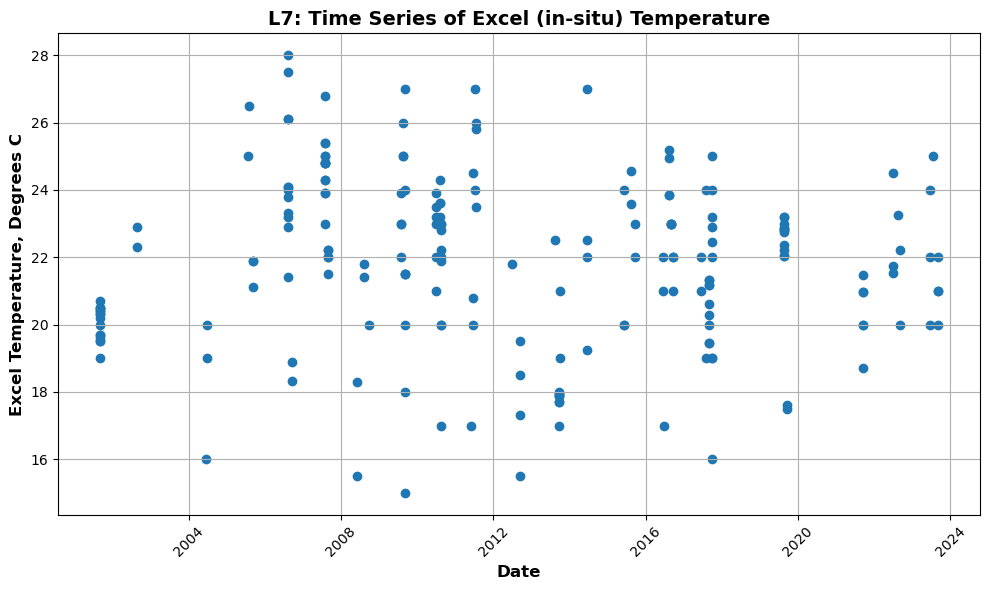

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert DATE_SMP column to datetime format
df_all_lakes_l7_cslap_aeap['DATE_SMP'] = pd.to_datetime(df_all_lakes_l7_cslap_aeap['DATE_SMP'])

# Sort the DataFrame by DATE_SMP
df_all_lakes_l7_cslap_aeap.sort_values(by='DATE_SMP', inplace=True)

# Plot the time series
plt.figure(figsize=(10, 6))
plt.scatter(df_all_lakes_l7_cslap_aeap['DATE_SMP'], df_all_lakes_l7_cslap_aeap['temp_field'], marker='o')
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Excel Temperature, Degrees C', fontsize=12, fontweight='bold')
plt.title('L7: Time Series of Excel (in-situ) Temperature', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


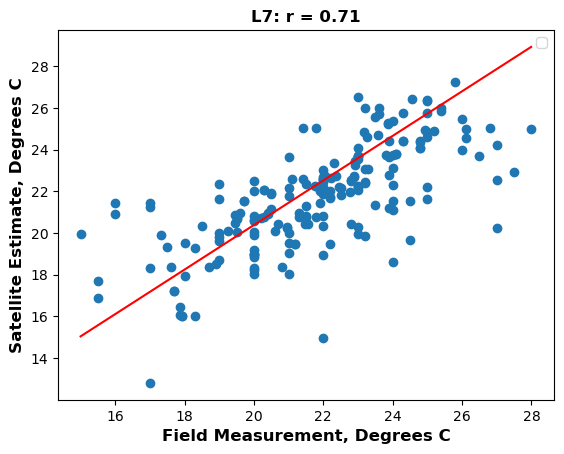

In [23]:
from sklearn.linear_model import RANSACRegressor
import matplotlib.pyplot as plt

# Filter out temperature values greater than 14 degrees Celsius and drop rows with NaN values in temp_satellite column for Landsat 7
df_cleaned_l7 = df_all_lakes_l7_cslap_aeap[df_all_lakes_l7_cslap_aeap['temp_field'] > 14].dropna(subset=['temp_satellite'])

# Fit RANSAC regression model on cleaned data for Landsat 7
ransac_l7 = RANSACRegressor(random_state=0)
ransac_l7.fit(df_cleaned_l7[['temp_field']], df_cleaned_l7['temp_satellite'])

# Get the inlier points and fitted line for Landsat 7
inlier_mask_l7 = ransac_l7.inlier_mask_
outlier_mask_l7 = np.logical_not(inlier_mask_l7)
line_X_l7 = np.arange(df_cleaned_l7['temp_field'].min(), df_cleaned_l7['temp_field'].max(), 0.01)[:, np.newaxis]
line_y_ransac_l7 = ransac_l7.predict(line_X_l7)

# Calculate the correlation coefficient for Landsat 7
r_value_l7 = df_cleaned_l7['temp_field'].corr(df_cleaned_l7['temp_satellite'])

# Plot the data points for Landsat 7
plt.scatter(df_cleaned_l7['temp_field'], df_cleaned_l7['temp_satellite'])
plt.xlabel('Field Measurement, Degrees C', fontsize=12, fontweight='bold')
plt.ylabel('Satellite Estimate, Degrees C', fontsize=12, fontweight='bold')

# Plot the RANSAC fitted line for Landsat 7
plt.plot(line_X_l7, line_y_ransac_l7, color='red')

# Add the correlation coefficient to the title for Landsat 7
plt.title(f'L7: r = {r_value_l7:.2f}', fontsize=12, fontweight='bold')

plt.legend()
plt.show()


In [45]:
df_cleaned_l7

,DATE_SMP,temp_satellite,PERMANENT_ID,SITE_NAME,Lon,Lat,pr,date,temp_field
822,2001-09-03,21.859816,53540671.0,G LAKE,-74.632896,43.414501,LCI,2001-09-03,20.5
793,2001-09-03,22.086504,131844130.0,CASCADE LAKE,-74.809831,43.789124,Aeap,2001-09-03,20.3
748,2001-09-03,20.729520,133099321.0,WILLYS LAKE (HORSESHOE),-74.958341,43.968516,Aeap,2001-09-03,20.2
771,2001-09-03,21.936803,53540671.0,G LAKE,-74.632888,43.414162,Aeap,2001-09-03,20.5
753,2001-09-03,21.532193,132437639.0,QUEER LAKE,-74.803991,43.813308,Aeap,2001-09-03,19.7
...,...,...,...,...,...,...,...,...,...
8124,2023-07-19,24.853423,131845875.0,BRANTINGHAM LAKE,-75.278397,43.693699,CSL,2023-07-19,25.0
8188,2023-09-01,20.010148,131845875.0,BRANTINGHAM LAKE,-75.278397,43.693699,CSL,2023-09-01,21.0
8253,2023-09-01,19.172019,115353775.0,LAKE PLACID,-73.959198,44.325199,CSL,2023-09-01,20.0
8200,2023-09-01,20.841836,92083789.0,LAKE GEORGE,-73.667461,43.522617,CSL,2023-09-01,22.0


In [24]:
import pandas as pd


# Specify the file path where you want to save the Excel file
file_path = 'df_all_lakes_l7_C1_L2_T1.xlsx'

# Export the DataFrame to Excel
# df_all_lakes_l7.to_excel(file_path, index=False)

print(f"DataFrame exported to '{file_path}' successfully.")

DataFrame exported to 'df_all_lakes_l7_C1_L2_T1.xlsx' successfully.


## Landsat 5

In [25]:
ee.Initialize()

# Define the Landsat 5 bands and their corresponding standard names
LC7_BANDS = ['ST_B6']
STD_NAMES = ['temp_satellite']

# all_lakes=ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALAP-ALTM-Lakes-195')

def maskL457sr(image):
    qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
    saturationMask = image.select('QA_RADSAT').eq(0)
    waterMask = image.select('QA_PIXEL').eq(5440).Or(image.select('QA_PIXEL').eq(5504))
    opticalBands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBand = image.select('ST_B6').multiply(0.00341802).add(-124.15)
    return image.addBands(opticalBands, None, True).addBands(thermalBand, None, True).updateMask(qaMask).updateMask(saturationMask).updateMask(waterMask)

def maskL457sr_SUMMER(image):
    qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
    saturationMask = image.select('QA_RADSAT').eq(0)
    waterMask = image.select('QA_PIXEL').eq(5440).Or(image.select('QA_PIXEL').eq(5504))
    opticalBands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBand = image.select('ST_B6').multiply(0.00341802).add(-124.15)
    #39000 is equivalent to 10 degree celcius
    temp_Summer = image.select('ST_B6').gt(40000)
    return image.addBands(opticalBands, None, True).addBands(thermalBand, None, True).updateMask(qaMask).updateMask(saturationMask).updateMask(waterMask).updateMask(temp_Summer)


# Define a function to compute the mean reflectance values for the specified bands within the region of interest (lake)
def reflectance(img, lake):
    reflectance_values = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=lake, scale=30).select(STD_NAMES)
    return img.set('DATE_SMP', img.date().format()).set('reflectance', reflectance_values)

# Initialize an empty list to store the dataframes for each lake
dfs = []

# cslap_aeap['date'] = pd.to_datetime(cslap_aeap['date'])

cslap_aeap_filtered = cslap_aeap[(cslap_aeap['Lat'].notnull()) & (cslap_aeap['Lon'].notnull())]

# Loop through each lake name and retrieve Landsat 5 imagery for that lake
for index, row in cslap_aeap_filtered.iterrows():
    # Extract lake information
    pondId = row['PERMANENT_ID']
    pondname = row['PONDNAME']
    Lon = row['Lon']
    Lat = row['Lat']
    pr = row['pr']
    
  
    # if isinstance(date, str):
    #     date = pd.to_datetime(date)
 
    # # Create a 2-day window around the current date
    # date_window_start = date - pd.Timedelta(days=3)
    # date_window_end = date + pd.Timedelta(days=3)

    lake_point = ee.Geometry.Point(row['Lon'], row['Lat'])

    #Create a 100-meter buffered box around the lake point
    lake_polygon = lake_point.buffer(100)
 
    # Retrieve Landsat 7 imagery for the specific lake
    l5 = ee.ImageCollection('LANDSAT/LT05/C02/T1_L2') \
        .filter(ee.Filter.calendarRange(6, 9, 'month')) \
        .filterBounds(lake_polygon) \
        .filter(ee.Filter.lt('CLOUD_COVER', 15)) \
        .map(maskL457sr_SUMMER) \
        .select(LC7_BANDS, STD_NAMES)


      # .filter(ee.Filter.calendarRange(5, 12, 'month')) \
      #   .filter(ee.Filter.calendarRange(1984, 2011, 'year')) \
    
    # Map the reflectance function over the Landsat 5 ImageCollection for the specific lake
    map_reflectance = l5.map(lambda img: reflectance(img, lake_polygon))

    # Reduce the mapped image collection to get reflectance values for the specific lake
    list_reflectance = map_reflectance.reduceColumns(ee.Reducer.toList(2), ['DATE_SMP', 'reflectance']).values().get(0)

    # Convert the results to a pandas DataFrame
    df_reflectance = pd.DataFrame(list_reflectance.getInfo(), columns=['DATE_SMP', 'reflectance'])
    df_reflectance['DATE_SMP'] = pd.to_datetime(df_reflectance['DATE_SMP'])
    df_reflectance['DATE_SMP'] = df_reflectance['DATE_SMP'].dt.date
    df_reflectance['reflectance'] = df_reflectance['reflectance'].apply(lambda x: {k: v for k, v in x.items() if v is not None})

    # Unpack the 'reflectance' dictionary and create separate columns for each band
    df_reflectance = pd.concat([df_reflectance.drop('reflectance', axis=1),
                                df_reflectance['reflectance'].apply(pd.Series).astype('float64', errors='ignore')], axis=1)
    
    df_reflectance['PERMANENT_ID'] = pondId
    df_reflectance['SITE_NAME'] = pondname
    df_reflectance['Lon'] = Lon
    df_reflectance['Lat'] = Lat
    df_reflectance['pr'] = pr


    # Add the DataFrame to the list
    dfs.append(df_reflectance)


# Concatenate all DataFrames into a single DataFrame
df_all_lakes_l5_SUMMER = pd.concat(dfs, ignore_index=True)

# Sort the DataFrame by 'DATE_SMP' in ascending order
df_all_lakes_l5_SUMMER.sort_values(by='DATE_SMP', inplace=True)

# df_all_lakes.dropna(inplace=True)
df_all_lakes_l5_SUMMER

,DATE_SMP,temp_satellite,PERMANENT_ID,SITE_NAME,Lon,Lat,pr
0,1984-06-08,NaN,131845875,BRANTINGHAM LAKE,-75.278397,43.693699,CSL
1094,1984-06-08,13.411068,131844984,LIMEKILN LAKE,-74.789760,43.714290,LCI
10206,1984-06-08,NaN,131845587,GRASS POND,-75.061021,43.692551,Aeap
10260,1984-06-08,NaN,131845583,MIDDLE BRANCH LAKE,-75.100226,43.699561,Aeap
10362,1984-06-08,14.375398,131844719,LAKE RONDAXE,-74.909753,43.760230,Aeap
...,...,...,...,...,...,...,...
10602,2011-07-30,NaN,131844130,CASCADE LAKE,-74.809831,43.789124,Aeap
8055,2011-07-30,25.479861,47725761,JENNY LAKE,-73.912804,43.267300,CSL
1607,2011-07-30,23.424210,131844637,SIXTH LAKE,-74.773570,43.749030,LCI
9605,2011-07-30,23.757390,53542009,PLEASANT LAKE,-74.599800,43.188400,CSL


In [26]:
df_all_lakes_l5_SUMMER.dropna(inplace=True)
df_all_lakes_l5_SUMMER

,DATE_SMP,temp_satellite,PERMANENT_ID,SITE_NAME,Lon,Lat,pr
1094,1984-06-08,13.411068,131844984,LIMEKILN LAKE,-74.789760,43.714290,LCI
10362,1984-06-08,14.375398,131844719,LAKE RONDAXE,-74.909753,43.760230,Aeap
10509,1984-06-08,14.181752,131844377,MOSS LAKE,-74.852461,43.784383,Aeap
10660,1984-06-08,15.246235,131844130,CASCADE LAKE,-74.809831,43.789124,Aeap
10807,1984-06-08,13.460503,131844150,DART LAKE,-74.869366,43.792735,Aeap
...,...,...,...,...,...,...,...
6467,2011-07-30,23.818430,92083789,LAKE GEORGE,-73.667461,43.522617,CSL
8055,2011-07-30,25.479861,47725761,JENNY LAKE,-73.912804,43.267300,CSL
1607,2011-07-30,23.424210,131844637,SIXTH LAKE,-74.773570,43.749030,LCI
9605,2011-07-30,23.757390,53542009,PLEASANT LAKE,-74.599800,43.188400,CSL


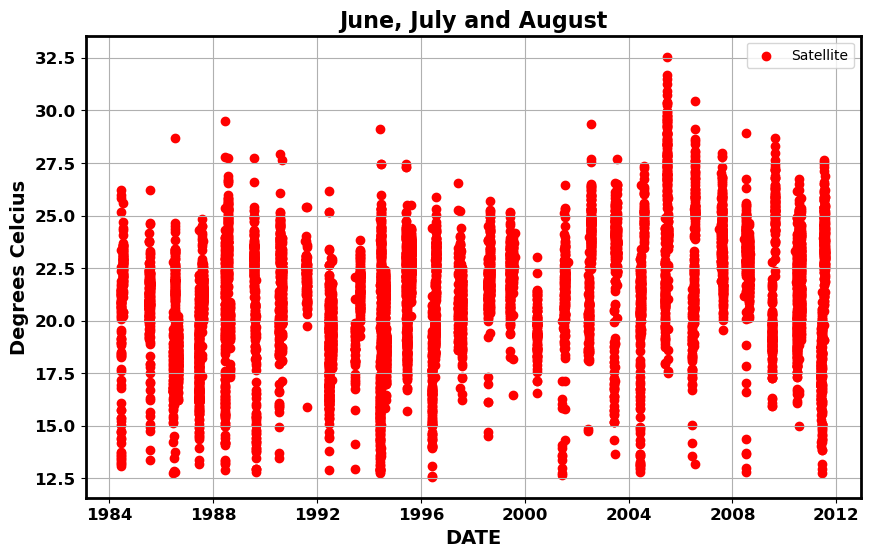

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_all_lakes_Landsat5 is your DataFrame
# Convert the date column to datetime format
df_all_lakes_l5_SUMMER['DATE_SMP'] = pd.to_datetime(df_all_lakes_l5_SUMMER['DATE_SMP'])
# cslap_aeap['date'] = pd.to_datetime(cslap_aeap['date'])

# Filter the data for the specified months
months_filter = df_all_lakes_l5_SUMMER['DATE_SMP'].dt.month.isin([6, 7, 8])
filtered_data = df_all_lakes_l5_SUMMER[months_filter]

# Plot temp_satellite and temp_excel in different colors
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['DATE_SMP'], filtered_data['temp_satellite'], label='Satellite', color='red')
# plt.scatter(cslap_aeap['date'], cslap_aeap['temp'], label='Field', color='blue')

plt.xlabel('DATE', fontsize=14, fontweight='bold')  # Set font size and weight for x-axis label
plt.ylabel('Degrees Celcius', fontsize=14, fontweight='bold')  # Set font size and weight for y-axis label
plt.title('June, July and August', fontsize=16, fontweight='bold')  # Set font size and weight for title

plt.legend()
plt.grid(True)

# Set border properties
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)  # Set border linewidth to bold

# Set ticks font size and weight
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.show()


In [28]:
import pandas as pd


# Specify the file path where you want to save the Excel file
file_path = 'Landsat5_135_LAKES_CSLAP_AEAP_TEMP_15%_SUMMER_100m_4302024.xlsx'

# Export the DataFrame to Excel
# df_all_lakes_l5_SUMMER.to_excel(file_path, index=False)   #UNCOMMENT THIS IF YOU WANT TO EXPORT IT TO EXCEL

print(f"DataFrame exported to '{file_path}' successfully.")

DataFrame exported to 'Landsat5_135_LAKES_CSLAP_AEAP_TEMP_15%_SUMMER_100m_4302024.xlsx' successfully.


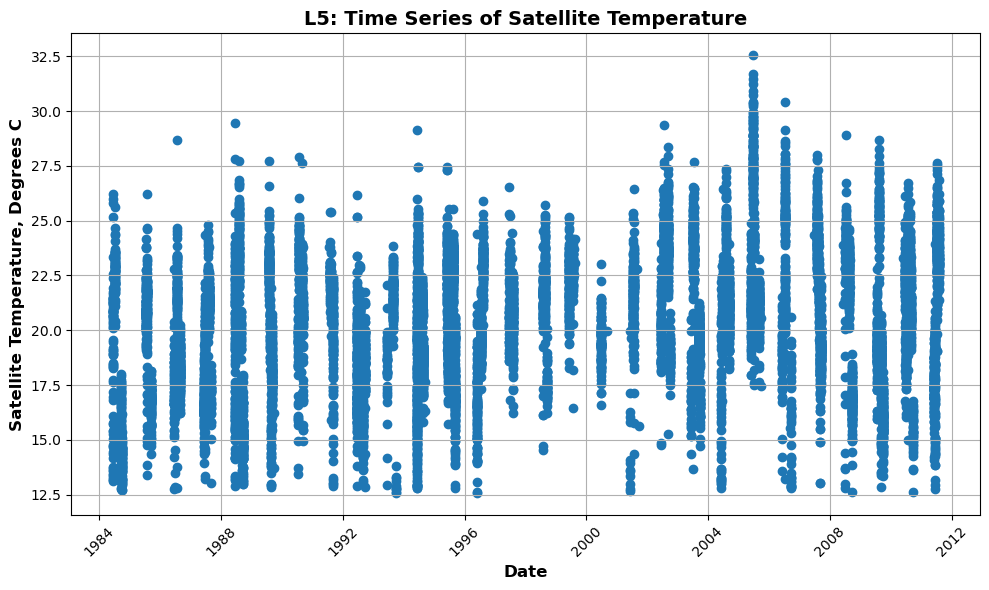

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
df_all_lakes_l5 = df_all_lakes_l5_SUMMER

# Convert DATE_SMP column to datetime format
df_all_lakes_l5_SUMMER['DATE_SMP'] = pd.to_datetime(df_all_lakes_l5_SUMMER['DATE_SMP'])

# Sort the DataFrame by DATE_SMP
df_all_lakes_l5_SUMMER.sort_values(by='DATE_SMP', inplace=True)

# Plot the time series
plt.figure(figsize=(10, 6))
plt.scatter(df_all_lakes_l5['DATE_SMP'], df_all_lakes_l5['temp_satellite'], marker='o', linestyle='-')
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Satellite Temperature, Degrees C', fontsize=12, fontweight='bold')
plt.title('L5: Time Series of Satellite Temperature', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()


In [29]:
import pandas as pd

# Read the first time series data from CSV
file_path = 'Landsat5_135_LAKES_CSLAP_AEAP_TEMP_15%_SUMMER_100m_4302024.xlsx'

df2 = pd.read_excel(file_path)

# Read the second time series data from CSV
file_path1 = 'CSLAP_AEAP_TEMP.xlsx'

df1 = pd.read_excel(file_path1)
# Convert 'PERMANENT_ID' column to numeric dtype
df1['PERMANENT_ID'] = pd.to_numeric(df1['PERMANENT_ID'], errors='coerce')
df2['PERMANENT_ID'] = pd.to_numeric(df2['PERMANENT_ID'], errors='coerce')
# Convert the 'date' columns to datetime objects

df2['date'] = pd.to_datetime(df2['DATE_SMP']).dt.date
df1['date'] = pd.to_datetime(df1['date']).dt.date

df2

,DATE_SMP,temp_satellite,PERMANENT_ID,SITE_NAME,Lon,Lat,pr,date
0,1984-06-08,13.411068,131844984.0,LIMEKILN LAKE,-74.789760,43.714290,LCI,1984-06-08
1,1984-06-08,14.375398,131844719.0,LAKE RONDAXE,-74.909753,43.760230,Aeap,1984-06-08
2,1984-06-08,14.181752,131844377.0,MOSS LAKE,-74.852461,43.784383,Aeap,1984-06-08
3,1984-06-08,15.246235,131844130.0,CASCADE LAKE,-74.809831,43.789124,Aeap,1984-06-08
4,1984-06-08,13.460503,131844150.0,DART LAKE,-74.869366,43.792735,Aeap,1984-06-08
...,...,...,...,...,...,...,...,...
10367,2011-07-30,23.818430,92083789.0,LAKE GEORGE,-73.667461,43.522617,CSL,2011-07-30
10368,2011-07-30,25.479861,47725761.0,JENNY LAKE,-73.912804,43.267300,CSL,2011-07-30
10369,2011-07-30,23.424210,131844637.0,SIXTH LAKE,-74.773570,43.749030,LCI,2011-07-30
10370,2011-07-30,23.757390,53542009.0,PLEASANT LAKE,-74.599800,43.188400,CSL,2011-07-30


In [30]:
# Merge satellite temperature data and field temperature data

import pandas as pd
# Drop rows with null values in 'PERMANENT_ID' column of the left DataFrame
df1.dropna(subset=['PERMANENT_ID'], inplace=True)

# Drop rows with null values in 'PERMANENT_ID' column of the right DataFrame
df2.dropna(subset=['PERMANENT_ID'], inplace=True)

# Initialize an empty list to store the merged data
merged_data = []

# Iterate over unique lake IDs in df2
for lake_id in df1['PERMANENT_ID'].unique():
    # Subset df1 for the current lake ID
    df1_subset = df1[df1['PERMANENT_ID'] == lake_id]
    
    # Subset df2 for the current lake ID
    df2_subset = df2[df2['PERMANENT_ID'] == lake_id]
    
    # Iterate over rows in df2 subset
    for _, row2 in df2_subset.iterrows():
        # Iterate over rows in df1 subset
        for _, row1 in df1_subset.iterrows():
            # Check if both dates are not null
            if pd.notnull(row1['date']) and pd.notnull(row2['date']):
                # Calculate the difference in dates
                date_diff = abs((row1['date'] - row2['date']).days)
                
                # Check if the dates match within the tolerance of ±3 days
                if date_diff <= 3:
                    # Add the 'temp' value from df1 to a new column in df2
                    row2['temp_field'] = row1['temp']
                    # Append the merged row to the list
                    merged_data.append(row2)
                    break  # Exit the inner loop once a matching date is found

# Create a DataFrame from the merged_data list
df_all_lakes_l5_cslap_aeap = pd.DataFrame(merged_data)

# Save the merged DataFrame to a CSV file
# merged_df.to_csv('merged_data.csv', index=False)

df_all_lakes_l5_cslap_aeap
# Save the merged DataFrame to a CSV file
# df_all_lakes_l5_cslap_aeap.to_csv('l5-scatter-sample-satellite-100m-15%.csv', index=False)


,DATE_SMP,temp_satellite,PERMANENT_ID,SITE_NAME,Lon,Lat,pr,date,temp_field
3950,1994-08-23,18.433096,131844150.0,DART LAKE,-74.869366,43.792735,Aeap,1994-08-23,20.2
3973,1994-08-23,18.326559,131844150.0,DART LAKE,-74.869366,43.792735,Aeap,1994-08-23,20.2
3978,1994-08-23,18.165894,131844150.0,DART LAKE,-74.862413,43.795737,LCI,1994-08-23,20.2
4042,1994-08-23,18.315842,131844150.0,DART LAKE,-74.862413,43.795737,LCI,1994-08-23,20.2
4323,1995-06-23,21.541641,131844150.0,DART LAKE,-74.862413,43.795737,LCI,1995-06-23,22.3
...,...,...,...,...,...,...,...,...,...
8167,2007-08-04,23.730978,47724773.0,JOCKEYBUSH LAKE,-74.585425,43.302292,Aeap,2007-08-04,24.8
10272,2011-07-14,23.554777,47724773.0,JOCKEYBUSH LAKE,-74.585425,43.302292,Aeap,2011-07-14,24.5
6037,2001-07-18,22.288231,47723283.0,WILLIS LAKE,-74.241514,43.368912,Aeap,2001-07-18,22.3
6703,2003-07-15,25.046255,47723283.0,WILLIS LAKE,-74.241514,43.368912,Aeap,2003-07-15,23.1


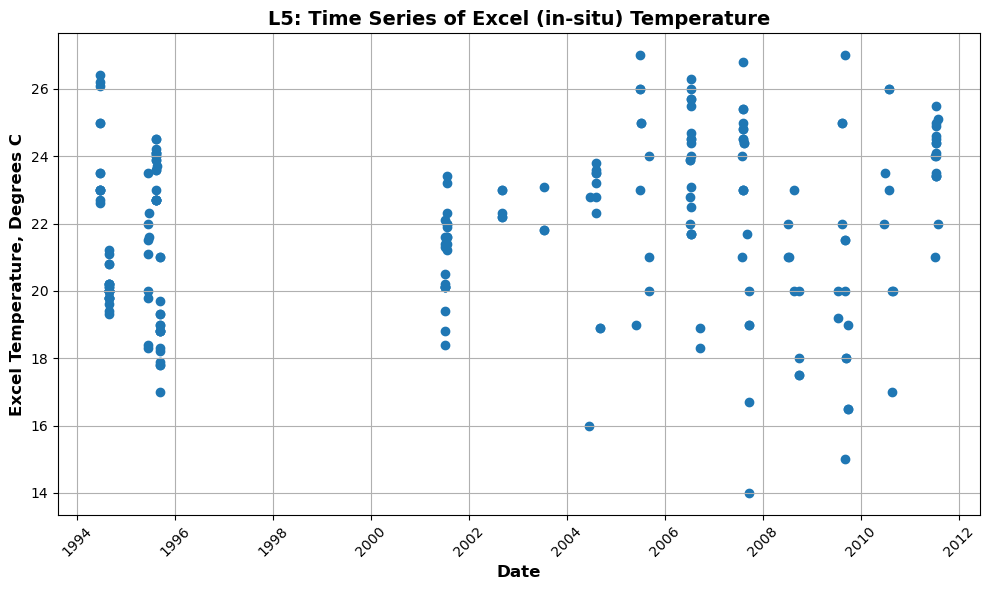

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert DATE_SMP column to datetime format
df_all_lakes_l5_cslap_aeap['DATE_SMP'] = pd.to_datetime(df_all_lakes_l5_cslap_aeap['DATE_SMP'])

# Sort the DataFrame by DATE_SMP
df_all_lakes_l5_cslap_aeap.sort_values(by='DATE_SMP', inplace=True)

# Plot the time series
plt.figure(figsize=(10, 6))
plt.scatter(df_all_lakes_l5_cslap_aeap['DATE_SMP'], df_all_lakes_l5_cslap_aeap['temp_field'], marker='o')
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Excel Temperature, Degrees C', fontsize=12, fontweight='bold')
plt.title('L5: Time Series of Excel (in-situ) Temperature', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


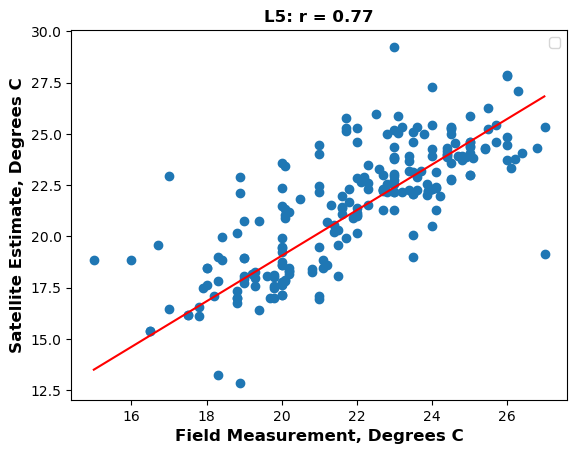

In [43]:
from sklearn.linear_model import RANSACRegressor
import matplotlib.pyplot as plt

# Filter out temperature values greater than 14 degrees Celsius and drop rows with NaN values in temp_satellite column for Landsat 5
df_cleaned_l5 = df_all_lakes_l5_cslap_aeap[df_all_lakes_l5_cslap_aeap['temp_field'] > 14].dropna(subset=['temp_satellite'])

# Fit RANSAC regression model on cleaned data for Landsat 5
ransac_l5 = RANSACRegressor(random_state=0)
ransac_l5.fit(df_cleaned_l5[['temp_field']], df_cleaned_l5['temp_satellite'])

# Get the inlier points and fitted line for Landsat 5
inlier_mask_l5 = ransac_l5.inlier_mask_
outlier_mask_l5 = np.logical_not(inlier_mask_l5)
line_X_l5 = np.arange(df_cleaned_l5['temp_field'].min(), df_cleaned_l5['temp_field'].max(), 0.01)[:, np.newaxis]
line_y_ransac_l5 = ransac_l5.predict(line_X_l5)

# Calculate the correlation coefficient for Landsat 5
r_value_l5 = df_cleaned_l5['temp_field'].corr(df_cleaned_l5['temp_satellite'])

# Plot the data points for Landsat 5
plt.scatter(df_cleaned_l5['temp_field'], df_cleaned_l5['temp_satellite'])
plt.xlabel('Field Measurement, Degrees C', fontsize=12, fontweight='bold')
plt.ylabel('Satellite Estimate, Degrees C', fontsize=12, fontweight='bold')

# Plot the RANSAC fitted line for Landsat 5
plt.plot(line_X_l5, line_y_ransac_l5, color='red')

# Add the correlation coefficient to the title for Landsat 5
plt.title(f'L5: r = {r_value_l5:.2f}', fontsize=12, fontweight='bold')

plt.legend()
plt.show()


In [46]:
df_cleaned_l5

,DATE_SMP,temp_satellite,PERMANENT_ID,SITE_NAME,Lon,Lat,pr,date,temp_field
3694,1994-06-20,23.063778,53540671.0,G LAKE,-74.632888,43.414162,Aeap,1994-06-20,23.0
3736,1994-06-20,23.339790,131845583.0,MIDDLE BRANCH LAKE,-75.100226,43.699561,Aeap,1994-06-20,26.1
3707,1994-06-20,22.936625,53540671.0,G LAKE,-74.632896,43.414501,LCI,1994-06-20,23.0
3660,1994-06-20,22.064355,131844130.0,CASCADE LAKE,-74.809831,43.789124,Aeap,1994-06-20,23.5
3682,1994-06-20,22.070321,131844130.0,CASCADE LAKE,-74.809831,43.789124,Aeap,1994-06-20,23.5
...,...,...,...,...,...,...,...,...,...
10211,2011-07-14,25.249519,92083789.0,LAKE GEORGE,-73.667461,43.522617,CSL,2011-07-14,25.5
10204,2011-07-14,25.888833,92083087.0,LINCOLN POND,-73.580498,44.129902,CSL,2011-07-14,25.0
10228,2011-07-14,23.122228,131846580.0,NORTH LAKE,-74.940170,43.526838,Aeap,2011-07-14,24.1
10327,2011-07-30,24.587166,89363405.0,EAGLE LAKE,-73.583099,43.880798,CSL,2011-07-30,22.0


## Landsat 5 & 7 Scatter plot

Number of pairs (L5): 224
Number of pairs (L7): 204
L5 RMSE: 1.9068616027998468
L5 Bias: 1.0150610510858574e-14
L7 RMSE: 1.7398563986143956
L7 Bias: 6.304325253557751e-15


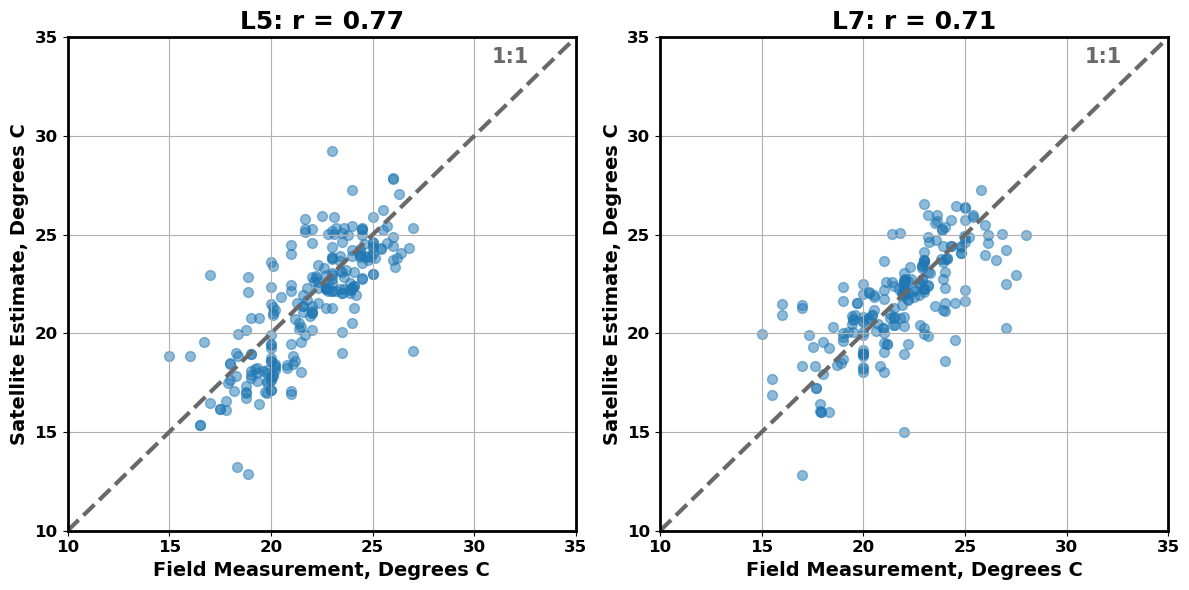

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Set numpy print options to avoid scientific notation
np.set_printoptions(suppress=True)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Drop rows with NaN values in the 'temp_field' or 'temp_satellite' columns for L5
df_cleaned_l5.dropna(subset=['temp_field', 'temp_satellite'], inplace=True)

# Plotting scatter plot for L5
ax1.scatter(df_cleaned_l5['temp_field'], df_cleaned_l5['temp_satellite'], s=50, alpha=0.5, label='L5')

# Calculate linear regression for L5
slope_l5, intercept_l5, r_value_l5, p_value_l5, std_err_l5 = linregress(df_cleaned_l5['temp_field'], df_cleaned_l5['temp_satellite'])

# Check if r_value_l5 is nan, if yes, print a message and skip plotting the fit line
if np.isnan(r_value_l5):
    print("Warning: NaN correlation coefficient (r) encountered for L5. Skipping fit line.")
else:
    # Add title with correlation coefficient (r) for L5
    ax1.set_title(f'L5: r = {r_value_l5:.2f}', fontsize=18, fontweight='bold')

    # Plot fit line for L5
    fit_line_l5 = np.polyfit(df_cleaned_l5['temp_field'], df_cleaned_l5['temp_satellite'], 1)
    ax1.plot(df_cleaned_l5['temp_field'], np.polyval(fit_line_l5, df_cleaned_l5['temp_field']), color='red', linestyle='solid', label='Fit Line')

ax1.set_xlabel('Field Measurement, Degrees C', fontsize=14, fontweight='bold')
ax1.set_ylabel('Satellite Estimate, Degrees C', fontsize=14, fontweight='bold')
ax1.grid(True)
ax1.tick_params(labelsize=12)  # Set tick label size
for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontweight('bold')  # Make tick labels bold
ax1.set_xlim(10, 35)
ax1.set_ylim(10, 35)

# Make axis borders thicker and darker for ax1
for spine in ax1.spines.values():
    spine.set_linewidth(2)
    spine.set_color('black')

# Drop rows with NaN values in the 'temp_field' or 'temp_satellite' columns for L7
df_cleaned_l7.dropna(subset=['temp_field', 'temp_satellite'], inplace=True)

# Plotting scatter plot for L7
ax2.scatter(df_cleaned_l7['temp_field'], df_cleaned_l7['temp_satellite'], s=50, alpha=0.5, label='L7')

# Calculate linear regression for L7
slope_l7, intercept_l7, r_value_l7, p_value_l7, std_err_l7 = linregress(df_cleaned_l7['temp_field'], df_cleaned_l7['temp_satellite'])

# Check if r_value_l7 is nan, if yes, print a message and skip plotting the fit line
if np.isnan(r_value_l7):
    print("Warning: NaN correlation coefficient (r) encountered for L7. Skipping fit line.")
else:
    # Add title with correlation coefficient (r) for L7
    ax2.set_title(f'L7: r = {r_value_l7:.2f}', fontsize=18, fontweight='bold')

    # Plot fit line for L7
    fit_line_l7 = np.polyfit(df_cleaned_l7['temp_field'], df_cleaned_l7['temp_satellite'], 1)
    ax2.plot(df_cleaned_l7['temp_field'], np.polyval(fit_line_l7, df_cleaned_l7['temp_field']), color='red', linestyle='solid', label='Fit Line')

ax2.set_xlabel('Field Measurement, Degrees C', fontsize=14, fontweight='bold')
ax2.set_ylabel('Satellite Estimate, Degrees C', fontsize=14, fontweight='bold')
ax2.grid(True)
ax2.tick_params(labelsize=12)  # Set tick label size
for label in ax2.get_xticklabels() + ax2.get_yticklabels():
    label.set_fontweight('bold')  # Make tick labels bold
ax2.set_xlim(10, 35)
ax2.set_ylim(10, 35)

# Make axis borders thicker and darker for ax2
for spine in ax2.spines.values():
    spine.set_linewidth(2)
    spine.set_color('black')

# Add longer 1:1 line through both scatter plots
min_val = min(ax1.get_xlim()[0], ax1.get_ylim()[0], ax2.get_xlim()[0], ax2.get_ylim()[0])
max_val = max(ax1.get_xlim()[1], ax1.get_ylim()[1], ax2.get_xlim()[1], ax2.get_ylim()[1])
ax1.plot([min_val, max_val], [min_val, max_val], color='dimgrey', linestyle='dashed', linewidth=3)
ax2.plot([min_val, max_val], [min_val, max_val], color='dimgrey', linestyle='dashed', linewidth=3)

# Add label "1:1" next to the dashed line
ax1.text((max_val + min_val) / 2 + 10.2, (max_val + min_val) / 2 + 11, '1:1', color='dimgrey', fontsize=15, fontweight='bold', ha='right', va='bottom')
ax2.text((max_val + min_val) / 2 + 10.2, (max_val + min_val) / 2 + 11, '1:1', color='dimgrey', fontsize=15, fontweight='bold', ha='right', va='bottom')

# Calculate the number of pairs for L5 and L7 datasets
n_pairs_l5 = len(df_cleaned_l5)
n_pairs_l7 = len(df_cleaned_l7)

# Print the number of pairs for L5 and L7 datasets
print("Number of pairs (L5):", n_pairs_l5)
print("Number of pairs (L7):", n_pairs_l7)

# Calculate Root Mean Squared Error (RMSE) and Bias for L5
predicted_l5 = np.polyval(fit_line_l5, df_cleaned_l5['temp_field'])
mse_l5 = np.mean((predicted_l5 - df_cleaned_l5['temp_satellite']) ** 2)
rmse_l5 = np.sqrt(mse_l5)
bias_l5 = np.mean(predicted_l5 - df_cleaned_l5['temp_satellite'])
print("L5 RMSE:", rmse_l5)
print("L5 Bias:", bias_l5)

# Calculate Root Mean Squared Error (RMSE) and Bias for L7
predicted_l7 = np.polyval(fit_line_l7, df_cleaned_l7['temp_field'])
mse_l7 = np.mean((predicted_l7 - df_cleaned_l7['temp_satellite']) ** 2)
rmse_l7 = np.sqrt(mse_l7)
bias_l7 = np.mean(predicted_l7 - df_cleaned_l7['temp_satellite'])
print("L7 RMSE:", rmse_l7)
print("L7 Bias:", bias_l7)

plt.tight_layout()

# Thickening figure borders
fig.patch.set_linewidth(2)

plt.show()


## CSL vs LCI

### Landsat 7

Number of pairs (LCI): 48
Number of pairs (CSL): 107
LCI RMSE: 1.1602036632169421
LCI Bias: 0.0
CSL RMSE: 1.8786405061028204
CSL Bias: -2.0751832235984235e-15


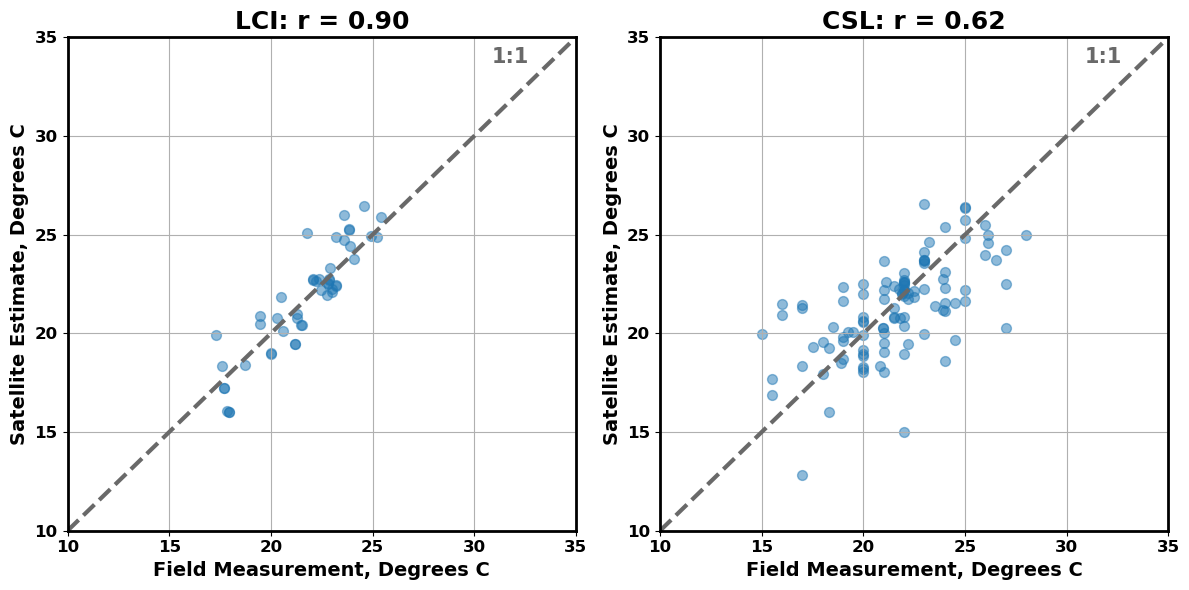

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Set numpy print options to avoid scientific notation
np.set_printoptions(suppress=True)

# Separate data for each provider
df_LCI = df_cleaned_l7[df_cleaned_l7['pr'] == 'LCI']
df_CSL = df_cleaned_l7[df_cleaned_l7['pr'] == 'CSL']

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plotting scatter plot for LCI
ax1.scatter(df_LCI['temp_field'], df_LCI['temp_satellite'], s=50, alpha=0.5, label='LCI')

# Calculate linear regression for LCI
slope_lci, intercept_lci, r_value_lci, p_value_lci, std_err_lci = linregress(df_LCI['temp_field'], df_LCI['temp_satellite'])

# Add title with correlation coefficient (r) for LCI
ax1.set_title(f'LCI: r = {r_value_lci:.2f}', fontsize=18, fontweight='bold')

# Plot fit line for LCI
# fit_line_lci = np.polyfit(df_LCI['temp_field'], df_LCI['temp_satellite'], 1)
# ax1.plot(df_LCI['temp_field'], np.polyval(fit_line_lci, df_LCI['temp_field']), color='red', linestyle='solid', label='Fit Line')

ax1.set_xlabel('Field Measurement, Degrees C', fontsize=14, fontweight='bold')
ax1.set_ylabel('Satellite Estimate, Degrees C', fontsize=14, fontweight='bold')
ax1.grid(True)
ax1.tick_params(labelsize=12)  # Set tick label size
for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontweight('bold')  # Make tick labels bold
ax1.set_xlim(10, 35)
ax1.set_ylim(10, 35)

# Make axis borders thicker and darker for ax1
for spine in ax1.spines.values():
    spine.set_linewidth(2)
    spine.set_color('black')

# Plotting scatter plot for CSL
ax2.scatter(df_CSL['temp_field'], df_CSL['temp_satellite'], s=50, alpha=0.5, label='CSL')

# Calculate linear regression for CSL
slope_csl, intercept_csl, r_value_csl, p_value_csl, std_err_csl = linregress(df_CSL['temp_field'], df_CSL['temp_satellite'])

# Add title with correlation coefficient (r) for CSL
ax2.set_title(f'CSL: r = {r_value_csl:.2f}', fontsize=18, fontweight='bold')

# Plot fit line for CSL
# fit_line_csl = np.polyfit(df_CSL['temp_field'], df_CSL['temp_satellite'], 1)
# ax2.plot(df_CSL['temp_field'], np.polyval(fit_line_csl, df_CSL['temp_field']), color='red', linestyle='solid', label='Fit Line')

ax2.set_xlabel('Field Measurement, Degrees C', fontsize=14, fontweight='bold')
ax2.set_ylabel('Satellite Estimate, Degrees C', fontsize=14, fontweight='bold')
ax2.grid(True)
ax2.tick_params(labelsize=12)  # Set tick label size
for label in ax2.get_xticklabels() + ax2.get_yticklabels():
    label.set_fontweight('bold')  # Make tick labels bold
ax2.set_xlim(10, 35)
ax2.set_ylim(10, 35)

# Make axis borders thicker and darker for ax2
for spine in ax2.spines.values():
    spine.set_linewidth(2)
    spine.set_color('black')

# Add longer 1:1 line through both scatter plots
min_val = min(ax1.get_xlim()[0], ax1.get_ylim()[0], ax2.get_xlim()[0], ax2.get_ylim()[0])
max_val = max(ax1.get_xlim()[1], ax1.get_ylim()[1], ax2.get_xlim()[1], ax2.get_ylim()[1])
ax1.plot([min_val, max_val], [min_val, max_val], color='dimgrey', linestyle='dashed', linewidth=3)
ax2.plot([min_val, max_val], [min_val, max_val], color='dimgrey', linestyle='dashed', linewidth=3)

# Add label "1:1" next to the dashed line
ax1.text((max_val + min_val) / 2 + 10.2, (max_val + min_val) / 2 + 11, '1:1', color='dimgrey', fontsize=15, fontweight='bold', ha='right', va='bottom')
ax2.text((max_val + min_val) / 2 + 10.2, (max_val + min_val) / 2 + 11, '1:1', color='dimgrey', fontsize=15, fontweight='bold', ha='right', va='bottom')

# Calculate the number of pairs for each dataset
n_pairs_lci = len(df_LCI)
n_pairs_csl = len(df_CSL)

# Print the number of pairs for each dataset
print("Number of pairs (LCI):", n_pairs_lci)
print("Number of pairs (CSL):", n_pairs_csl)

# Calculate Root Mean Squared Error (RMSE) and Bias for LCI
predicted_lci = np.polyval([slope_lci, intercept_lci], df_LCI['temp_field'])
rmse_lci = np.sqrt(np.mean((predicted_lci - df_LCI['temp_satellite']) ** 2))
bias_lci = np.mean(predicted_lci - df_LCI['temp_satellite'])
print("LCI RMSE:", rmse_lci)
print("LCI Bias:", bias_lci)

# Calculate Root Mean Squared Error (RMSE) and Bias for CSL
predicted_csl = np.polyval([slope_csl, intercept_csl], df_CSL['temp_field'])
rmse_csl = np.sqrt(np.mean((predicted_csl - df_CSL['temp_satellite']) ** 2))
bias_csl = np.mean(predicted_csl - df_CSL['temp_satellite'])
print("CSL RMSE:", rmse_csl)
print("CSL Bias:", bias_csl)


plt.tight_layout()

# Thickening figure borders
fig.patch.set_linewidth(2)

plt.show()


Number of pairs (LCI): 18
Number of pairs (CSL): 73
LCI RMSE: 0.8028114063985745
LCI Bias: 8.092292268378918e-15
CSL RMSE: 2.351056532158438
CSL Bias: 9.611793857028752e-15


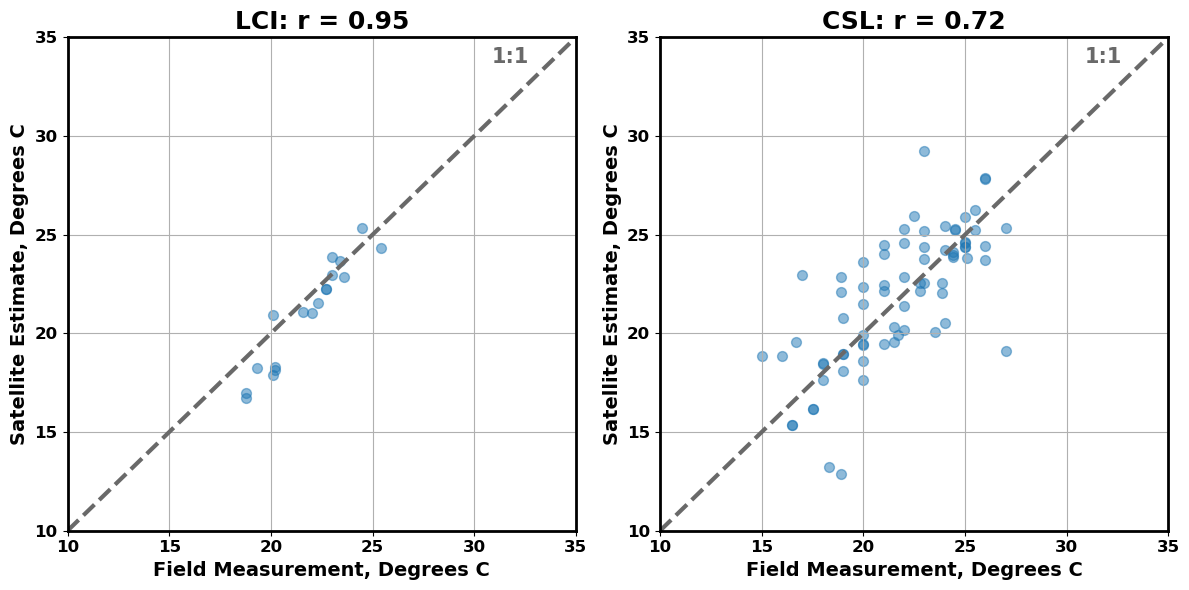

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Set numpy print options to avoid scientific notation
np.set_printoptions(suppress=True)

# Separate data for each provider
df_LCI = df_cleaned_l5[df_cleaned_l5['pr'] == 'LCI']
df_CSL = df_cleaned_l5[df_cleaned_l5['pr'] == 'CSL']

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plotting scatter plot for LCI
ax1.scatter(df_LCI['temp_field'], df_LCI['temp_satellite'], s=50, alpha=0.5, label='LCI')

# Calculate linear regression for LCI
slope_lci, intercept_lci, r_value_lci, p_value_lci, std_err_lci = linregress(df_LCI['temp_field'], df_LCI['temp_satellite'])

# Add title with correlation coefficient (r) for LCI
ax1.set_title(f'LCI: r = {r_value_lci:.2f}', fontsize=18, fontweight='bold')

# Plot fit line for LCI
# fit_line_lci = np.polyfit(df_LCI['temp_field'], df_LCI['temp_satellite'], 1)
# ax1.plot(df_LCI['temp_field'], np.polyval(fit_line_lci, df_LCI['temp_field']), color='red', linestyle='solid', label='Fit Line')

ax1.set_xlabel('Field Measurement, Degrees C', fontsize=14, fontweight='bold')
ax1.set_ylabel('Satellite Estimate, Degrees C', fontsize=14, fontweight='bold')
ax1.grid(True)
ax1.tick_params(labelsize=12)  # Set tick label size
for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontweight('bold')  # Make tick labels bold
ax1.set_xlim(10, 35)
ax1.set_ylim(10, 35)

# Make axis borders thicker and darker for ax1
for spine in ax1.spines.values():
    spine.set_linewidth(2)
    spine.set_color('black')

# Plotting scatter plot for CSL
ax2.scatter(df_CSL['temp_field'], df_CSL['temp_satellite'], s=50, alpha=0.5, label='CSL')

# Calculate linear regression for CSL
slope_csl, intercept_csl, r_value_csl, p_value_csl, std_err_csl = linregress(df_CSL['temp_field'], df_CSL['temp_satellite'])

# Add title with correlation coefficient (r) for CSL
ax2.set_title(f'CSL: r = {r_value_csl:.2f}', fontsize=18, fontweight='bold')

# Plot fit line for CSL
# fit_line_csl = np.polyfit(df_CSL['temp_field'], df_CSL['temp_satellite'], 1)
# ax2.plot(df_CSL['temp_field'], np.polyval(fit_line_csl, df_CSL['temp_field']), color='red', linestyle='solid', label='Fit Line')

ax2.set_xlabel('Field Measurement, Degrees C', fontsize=14, fontweight='bold')
ax2.set_ylabel('Satellite Estimate, Degrees C', fontsize=14, fontweight='bold')
ax2.grid(True)
ax2.tick_params(labelsize=12)  # Set tick label size
for label in ax2.get_xticklabels() + ax2.get_yticklabels():
    label.set_fontweight('bold')  # Make tick labels bold
ax2.set_xlim(10, 35)
ax2.set_ylim(10, 35)

# Make axis borders thicker and darker for ax2
for spine in ax2.spines.values():
    spine.set_linewidth(2)
    spine.set_color('black')

# Add longer 1:1 line through both scatter plots
min_val = min(ax1.get_xlim()[0], ax1.get_ylim()[0], ax2.get_xlim()[0], ax2.get_ylim()[0])
max_val = max(ax1.get_xlim()[1], ax1.get_ylim()[1], ax2.get_xlim()[1], ax2.get_ylim()[1])
ax1.plot([min_val, max_val], [min_val, max_val], color='dimgrey', linestyle='dashed', linewidth=3)
ax2.plot([min_val, max_val], [min_val, max_val], color='dimgrey', linestyle='dashed', linewidth=3)

# Add label "1:1" next to the dashed line
ax1.text((max_val + min_val) / 2 + 10.2, (max_val + min_val) / 2 + 11, '1:1', color='dimgrey', fontsize=15, fontweight='bold', ha='right', va='bottom')
ax2.text((max_val + min_val) / 2 + 10.2, (max_val + min_val) / 2 + 11, '1:1', color='dimgrey', fontsize=15, fontweight='bold', ha='right', va='bottom')

# Calculate the number of pairs for each dataset
n_pairs_lci = len(df_LCI)
n_pairs_csl = len(df_CSL)

# Print the number of pairs for each dataset
print("Number of pairs (LCI):", n_pairs_lci)
print("Number of pairs (CSL):", n_pairs_csl)

# Calculate Root Mean Squared Error (RMSE) and Bias for LCI
predicted_lci = np.polyval(fit_line_lci, df_LCI['temp_field'])
rmse_lci = np.sqrt(np.mean((predicted_lci - df_LCI['temp_satellite']) ** 2))
bias_lci = np.mean(predicted_lci - df_LCI['temp_satellite'])
print("LCI RMSE:", rmse_lci)
print("LCI Bias:", bias_lci)

# Calculate Root Mean Squared Error (RMSE) and Bias for CSL
predicted_csl = np.polyval(fit_line_csl, df_CSL['temp_field'])
rmse_csl = np.sqrt(np.mean((predicted_csl - df_CSL['temp_satellite']) ** 2))
bias_csl = np.mean(predicted_csl - df_CSL['temp_satellite'])
print("CSL RMSE:", rmse_csl)
print("CSL Bias:", bias_csl)

plt.tight_layout()

# Thickening figure borders
fig.patch.set_linewidth(2)

plt.show()


In [ ]:
Map = geemap.Map()


lake_point = ee.Geometry.Point(-75.278397, 43.693699)

lake_polygon = lake_point.buffer(90)
Map.addLayer(lake_polygon)

Map.centerObject(lake_polygon, 16)

# Display the map
Map

DESCRIPTION

1. CSLAP_TEMP DATA STEPS
    a. Filter CHARACTERISTIC_NAME column == TEMPERATURE
    b. Remove NaN Columns
    c. Select Time 9-11 am
    d. Rename columns based on AEAP because I want to concat both df and do not want different names
    e. Only taking columns Lon, Lat, ID, Lake Name, Temp values

2. Concat AeaP data(temp csv that professor merged to get coordinates information) and CSLAP 
3. Use L5 C2 T1 raw scenes
4. Month: August
5. Cloud Cover: 50 
6. FilterBounds: Based on Lat and Lon

---------------------------------------------CODE---------------------------------------------------------------

In [ ]:
# import ee
# import pandas as pd
# import math  # Import the math module

# # ee.Authenticate()

# # Initialize Earth Engine
# ee.Initialize()



# LC5_BANDS = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7','SZA', 'VZA', 'VAA','SAA']

# def maskL457sr(image):
#     qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
#     saturationMask = image.select('QA_RADSAT').eq(0)
#     waterMask = image.select('QA_PIXEL').eq(5440).Or(image.select('QA_PIXEL').eq(5504))
#     opticalBands = image.select('B.').multiply(0.0000275).add(-0.2)
#     thermalBand = image.select('B6').multiply(0.00341802).add(-124.15)
#     # thermalBand = image.select('ST_B6').multiply(0.00341802).add(-124.15)

#     return image.addBands(opticalBands, None, True).addBands(thermalBand, None, True).updateMask(qaMask).updateMask(saturationMask).updateMask(waterMask)

# # Define a function to compute the mean and standard deviation of reflectance values for each band
# def reflectance(img, lake_bbox):
#     reflectance_values = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=lake_bbox, scale=30).select(LC5_BANDS)
#     return img.set('DATE_SMP', img.date().format()).set('reflectance', reflectance_values)

# # Initialize an empty list to store the filtered DataFrames for each combination of path and row
# filtered_dfs = []

# for _, row_coord in cslap_aeap.iterrows():
#     LakeID = row_coord['PERMANENT_ID']
#     LakeName = row_coord['lake.name']
#     lat = row_coord['Lon']  # Extract latitude
#     lon = row_coord['Lat']  # Extract longitude
#     date = pd.to_datetime(row_coord['date'])  # Convert sample date to datetime

#     # Create a 2-day window around the current date
#     date_window_start = date - pd.Timedelta(days=3)
#     date_window_end = date + pd.Timedelta(days=3)
    
#     lake_point = ee.Geometry.Point(row_coord['Lon'], row_coord['Lat'])
    
#     lake_bbox = lake_point.buffer(100)

#     l5 =  ee.ImageCollection("LANDSAT/LT05/C02/T1")  \
#         .filter(ee.Filter.calendarRange(8, 8, 'month')) \
#         .filterDate(date_window_start, date_window_end) \
#         .filterBounds(lake_bbox) \
#         .filter(ee.Filter.lt('CLOUD_COVER', 50)) \
#         .select(LC5_BANDS)

    
    
#     # Print the size of the ImageCollection
#     print('Number of images in l5:', l5.size().getInfo())

    
#     # Map the reflectance function over the Landsat imagery for the specific path and row
#     map_reflectance = l5.map(lambda img: reflectance(img, lake_bbox))
        
#     # Reduce the mapped image collection to get reflectance values for the specific path and row
#     list_reflectance = map_reflectance.reduceColumns(ee.Reducer.toList(2), ['DATE_SMP', 'reflectance']).values().get(0)

#     # Convert the results to a pandas DataFrame
#     df_reflectance = pd.DataFrame(list_reflectance.getInfo(), columns=['DATE_SMP', 'reflectance'])
#     df_reflectance['DATE_SMP'] = pd.to_datetime(df_reflectance['DATE_SMP'])
#     df_reflectance['DATE_SMP'] = df_reflectance['DATE_SMP'].dt.date
#     df_reflectance['reflectance'] = df_reflectance['reflectance'].apply(
#         lambda x: {k: v for k, v in x.items() if v is not None})

#     # Unpack the 'reflectance' dictionary and create separate columns for each band
#     df_reflectance = pd.concat([df_reflectance.drop('reflectance', axis=1),
#                                 df_reflectance['reflectance'].apply(pd.Series).astype('float64', errors='ignore')], axis=1)

#     # Add additional columns including latitude and longitude
#     df_reflectance['LakeID'] = LakeID
#     df_reflectance['LakeName'] = LakeName
#     df_reflectance['Latitude'] = lat  # Add latitude
#     df_reflectance['Longitude'] = lon  # Add longitude
#     df_reflectance['Sample_date'] = date

#     # Add the DataFrame to the list
#     filtered_dfs.append(df_reflectance)

# # Concatenate all filtered DataFrames into a single DataFrame
# df_filtered_lakes = pd.concat(filtered_dfs, ignore_index=True)
 
# # Sort the DataFrame by 'DATE' in ascending order
# df_filtered_lakes.sort_values(by='DATE_SMP', inplace=True)

# df_filtered_lakes


In [ ]:
# df_filtered_lakes_NEw['B6_Temp'] = 0.055375 * df_filtered_lakes['B6'] + 1.18243
# df_filtered_lakes_NEw

In [ ]:
# import pandas as pd

# # File paths
# file_path = 'aeapTDO.csv'
# coord_file_path = 'adk-lakes-centroids-centerextracted.csv'

# # Read the CSV files into DataFrames
# df = pd.read_csv(file_path)
# df_coord = pd.read_csv(coord_file_path)

# # Drop rows with NaN values in the 'PERMANENT_ID' column in both DataFrames
# df.dropna(subset=['PERMANENT_ID'], inplace=True)
# df_coord.dropna(subset=['PERMANENT_ID'], inplace=True)

# # Convert 'PERMANENT_ID' column to string in both DataFrames
# df['PERMANENT_ID'] = df['PERMANENT_ID'].astype(str)
# df_coord['PERMANENT_ID'] = df_coord['PERMANENT_ID'].astype(str)

# # Define the columns to be merged
# merge_columns = ['PERMANENT_ID', 'area_ha', 'Lon', 'Lat']

# # Merge DataFrames on 'PERMANENT_ID' column
# df_m = pd.merge(df, df_coord[merge_columns], on='PERMANENT_ID', how='left')
# df_merge = df_m[df_m['depth'] == 0]


# # Display the merged DataFrame
# print(df_merge)

# # Export the merged DataFrame to a CSV file
# csv_file_path = 'temp-data.csv'
# df_merge.to_csv(csv_file_path, index=False)


In [23]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
file_path = r"C:\Users\aisha\Downloads\cslap_aeap_table_paramters.csv"
data = pd.read_csv(file_path)

# Check for unique values in the 'PERMANENT_ID' column
unique_ids = data['PERMANENT_ID'].unique()

# Count the number of unique IDs
num_unique_ids = len(unique_ids)

# Check for duplicate IDs
duplicate_ids = data[data.duplicated(subset=['PERMANENT_ID'], keep=False)]

# Display the results
print("Number of unique IDs:", num_unique_ids)
if len(duplicate_ids) > 0:
    print("\nDuplicate IDs:")
    print(duplicate_ids[['PERMANENT_ID']])
else:
    print("\nNo duplicate IDs found.")


Number of unique IDs: 132

Duplicate IDs:
    PERMANENT_ID
4      131844150
10     131844984
105     53542311
110     53542311
112     53540671
121    131844150
125    131844984
135     53540671


In [24]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
file_path = r"C:\Users\aisha\Downloads\cslap_aeap_table_paramters.csv"
data = pd.read_csv(file_path)

# Filter for unique IDs
unique_data = data.drop_duplicates(subset=['PERMANENT_ID'])

unique_data

# # Save the filtered data to a new CSV file
# filtered_file_path = r"C:\Users\aisha\Downloads\filtered_cslap_aeap_table_paramters.csv"
# unique_data.to_csv(filtered_file_path, index=False)

# print("Filtered data saved to:", filtered_file_path)


,LAKE_NAME,LATTITUDE,LONGITUDE,DATA_PROVIDER,PERMANENT_ID,AREA (Sqkm),ELEVATION,MEAN_DEPTH
0,BRANTINGHAM LAKE,43.693699,-75.278397,CSL,131845875,1.350795,376.0,7.5
1,BUG LAKE,43.769240,-74.729980,LCI,131844242,0.358280,608.0,6.1
2,CHASE LAKE,43.757599,-75.302902,CSL,131845260,0.473086,379.0,5.1
3,COPPER LAKE,43.666079,-75.142166,LCI,131845963,0.243528,0.0,NaN
4,DART LAKE,43.795737,-74.862413,LCI,131844150,0.565892,537.0,7.3
...,...,...,...,...,...,...,...,...
130,NORTH LAKE,43.526838,-74.940170,AEAP,131846580,1.768000,555.0,5.7
131,WILLIS LAKE,43.368912,-74.241514,AEAP,47723283,0.146000,397.0,1.6
132,JOCKEYBUSH LAKE,43.302292,-74.585425,AEAP,47724773,0.173000,599.0,4.5
133,SAGAMORE LAKE,43.768003,-74.622173,AEAP,132437679,0.680000,580.0,10.5


In [25]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
file_path = r"C:\Users\aisha\Downloads\cslap_aeap_table_paramters.csv"
data = pd.read_csv(file_path)

# Group by 'DATA_PROVIDER' and count unique 'PERMANENT_ID' values in each group
unique_ids_per_provider = data.groupby('DATA_PROVIDER')['PERMANENT_ID'].nunique()

# Display the result
print("Number of unique IDs per data provider:")
print(unique_ids_per_provider)


Number of unique IDs per data provider:
DATA_PROVIDER
AEAP    23
CSL     32
LCI     80
Name: PERMANENT_ID, dtype: int64


In [26]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
file_path = r"C:\Users\aisha\Downloads\cslap_aeap_table_paramters.csv"
data = pd.read_csv(file_path)

# Group by 'DATA_PROVIDER' and filter for unique 'PERMANENT_ID' in each group
filtered_data = data.groupby('DATA_PROVIDER').apply(lambda x: x.drop_duplicates(subset='PERMANENT_ID'))

# Reset index after grouping
filtered_data.reset_index(drop=True, inplace=True)

filtered_data


,LAKE_NAME,LATTITUDE,LONGITUDE,DATA_PROVIDER,PERMANENT_ID,AREA (Sqkm),ELEVATION,MEAN_DEPTH
0,LOON HOLLOW POND,43.963313,-75.042950,AEAP,133099412,0.057000,607.0,3.4
1,WILLYS LAKE (HORSESHOE),43.968516,-74.958341,AEAP,133099321,0.000000,630.0,4.9
2,MIDDLE SETTLEMENT LAKE,43.684791,-75.097416,AEAP,131845717,0.158000,526.0,3.4
3,GRASS POND,43.692551,-75.061021,AEAP,131845587,0.053000,546.0,1.5
4,MIDDLE BRANCH LAKE,43.699561,-75.100226,AEAP,131845583,0.170000,494.0,2.1
...,...,...,...,...,...,...,...,...
130,THIRD LAKE ESSEX CHAIN,43.877710,-74.249000,LCI,89363513,1.154082,487.7,6.3
131,KLONDIKE RESERVOIR,43.231961,-74.787972,LCI,53541797,0.457000,530.4,3.4
132,VANDENBURG POND,43.117764,-74.364044,LCI,47727911,0.583000,1485.0,1.2
133,DEER LAKE,43.554911,-74.761378,LCI,53540061,0.143000,0.0,NaN


In [27]:
# Export the filtered data to a new CSV file
# filtered_file_path = r"C:\Users\aisha\Downloads\cslap_aeap_paramters.csv"
# filtered_data.to_csv(filtered_file_path, index=False)

# print("Filtered data saved to:", filtered_file_path)

Filtered data saved to: C:\Users\aisha\Downloads\cslap_aeap_paramters.csv
